## PROBLEM STATEMENT

## BUSINESS PROBLEM UNDERSTANDING

## OBJECTIVE

## DATA DESCRIPTION

In [7]:
import pandas as pd 
columns = {
    "ID": "Unique ID",
    "Asst_Reg": "Value of all the assets registered under the borrower's name",
    "GGGrade": "Grant Group Grade - Rating given to borrower , to know how trustworthy the borrower is and the possibility of him repaying the debt.",
    "Experience": "Total year of work experience of the borrower",
    "Validation": "Validation status of the borrower",
    "Yearly Income": "Total yearly income of the borrower",
    "Home Status": "Borrower living status",
    "Unpaid 2 years": "Number of times the Borrower has defaulted in the last two years",
    "Already Defaulted": "Number of other loans the borrower was default",
    "Designation": "Designation of Borrower",
    "Debt to Income": "Debt to Income ratio",
    "Postal Code": "Postal code of borrower",
    "Lend Amount": "Total funded amount to borrower",
    "Deprecatory Records": "An entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services",
    "Interest Charged": "Interest charged on total amount",
    "Usage Rate": "Processing Charges on the Loan Amount",
    "Inquiries": "Inquiries in Last 6 Months",
    "Present Balance": "Current balance in the borrower account",
    "Gross Collection": "The gross amount payable by way of Settlement or judgment in respect of the Claims, excluding any costs",
    "Sub GGGrade": "Sub Grant Group Grade - A subcategory or additional rating within the GGGrade",
    "File Status": "Status of the loan file",
    "State": "State to which borrower belongs",
    "Account Open": "Total number of open accounts in the name of Borrower",
    "Total Unpaid CL": "Unpaid dues on all the other loans",
    "Duration": "Duration for the amount is funded to borrower",
    "Unpaid Amount": "Unpaid balance on the credit card",
    "Reason": "Reason for loan application",
    "Claim Type": "Amongst all Application type what is the borrower Claim Type [ I - Individual Account, J - Joint Account ]",
    "Due Fee": "Charges incurred if the payment on loan amount is delayed",
    "Loan/No Loan": "Target Variable : Class 0 = Loan rejected & Class 1 = Loan Approved"
}

# Create a DataFrame with columns and their descriptions
data = pd.DataFrame(list(columns.items()), columns=["Column Name", "Description"])
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
data.set_index('Column Name')



,Description
Column Name,
ID,Unique ID
Asst_Reg,Value of all the assets registered under the borrower's name
GGGrade,"Grant Group Grade - Rating given to borrower , to know how trustworthy the borrower is and the possibility of him repaying the debt."
Experience,Total year of work experience of the borrower
Validation,Validation status of the borrower
Yearly Income,Total yearly income of the borrower
Home Status,Borrower living status
Unpaid 2 years,Number of times the Borrower has defaulted in the last two years
Already Defaulted,Number of other loans the borrower was default


## IMPORTING LIBRARIES 

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_auc_score

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC

from scipy.stats import mannwhitneyu,kruskal

import scipy.stats as stats

# pd.set_option('float_format','{:.2f}'.format)
pd.set_option('display.max_columns',None)

## READING FILE

In [9]:
data = pd.read_csv("Data_Train.csv")
data

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,REN?,0,0,Engineer Support II,19.3200,48000.0,10260.00,0,8.35,51.084,1,15100.14,0.0,17,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,REN?,0,0,Dental Hygienist,48.8208,1400.0,27360.00,0,24.18,129.172,0,102811.88,0.0,28,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MOR??AGE,0,0,Interface Coordinator,7.7952,6400.0,8550.00,3,11.03,83.420,1,14584.11,0.0,16,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MOR??AGE,0,0,PARTS CLERK,8.2992,16800.0,23769.00,1,22.52,56.760,1,59281.66,0.0,25,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0


## UNDERSTANDING DATA

#### Shape of data

In [10]:
print('Number of Rows in the dataset :',data.shape[0])
print('Number of Columns/features in the dataset :',data.shape[1])

Number of Rows in the dataset : 87500
Number of Columns/features in the dataset : 30


#### Data Information

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

##### <font color='Blue'>INFERENCE :</font>
* There are about 11 features with Floating Datatype , 9 features with Integer datatype and 10 features with object datatype
* Missing/Null values presence can be seen in some columns

#### 5-Point Summary 

In [12]:
data.drop('Loan/No Loan',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
ID,87500.0,8.394625e+04,3.610010e+04,21560.0,5.261675e+04,8.390000e+04,1.152612e+05,1.465590e+05
Asst_Reg,87500.0,3.798914e+06,2.289038e+06,24847.0,1.483874e+06,4.132010e+06,5.952909e+06,7.351847e+06
Yearly Income,81925.0,1.348596e+05,9.882473e+04,8800.0,8.324659e+04,1.144000e+05,1.601600e+05,8.264031e+06
Unpaid 2 years,87500.0,3.329371e-01,8.760799e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01
Already Defaulted,87500.0,5.725714e-03,8.350455e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
Debt to Income,84011.0,3.094266e+01,1.407981e+01,0.0,2.042880e+01,3.013920e+01,4.090800e+01,6.392904e+02
Postal Code,86111.0,5.115539e+04,3.121123e+04,1000.0,2.290000e+04,4.770000e+04,8.020000e+04,9.990000e+04
Lend Amount,87500.0,2.592054e+04,1.443384e+04,1710.0,1.504800e+04,2.394000e+04,3.420000e+04,5.985000e+04
Deprecatory Records,87500.0,2.024000e-01,6.464135e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.600000e+01
Interest Charged,87500.0,1.651837e+01,4.902011e+00,8.0,1.231000e+01,1.649000e+01,2.077000e+01,2.500000e+01


##### <font color='Blue'>INFERENCE :</font>
* The minimum yearly income is 8800 and Maximum yearly income is 8264030 
* The 25% of the yearly income lies below 83000 approx
* The income distribution shows a high mean with a wide range and high variability, indicating that most individuals have moderate incomes, there are some with extremely high incomes.
* There is presence of outliers in the Already Defaulted feature as 75% of the data has value 0 indicating that most individuals have not defaulted previously.

In [13]:
data.drop('Loan/No Loan',axis=1).describe(include='object').T

,count,unique,top,freq
GGGrade,87500,7,II,24966
Experience,87500,11,>10yrs,30849
Validation,87500,3,Source Verified,34504
Home Status,87500,5,MOR??AGE,44160
Designation,86086,40354,School Teacher,1585
File Status,87500,2,whole,46300
State,87500,49,California,12625
Duration,87500,2,3 years,60061
Reason,87500,13,debt consolidation,52559
Claim Type,87500,2,I,87454


##### <font color='Blue'>INFERENCE :</font>
* The Designation column has large number of unique values.
* Most Loan applying individuals have Experience greater than 10 years

In [14]:
# Separating the numeric and categorical columns
data_num=data.select_dtypes(exclude=object)
data_cat=data.select_dtypes(include=object)

In [15]:
data_num.columns

Index(['ID', 'Asst_Reg', 'Yearly Income', 'Unpaid 2 years',
       'Already Defaulted', 'Debt to Income', 'Postal Code', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'Account Open',
       'Total Unpaid CL', 'Unpaid Amount', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

In [16]:
# Dropping the Target Variable
data_num.drop(['Loan/No Loan','ID'],axis=1,inplace=True)

In [17]:
data_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'Account Open', 'Total Unpaid CL',
       'Unpaid Amount', 'Due Fee'],
      dtype='object')

In [18]:
data_cat.columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Designation',
       'File Status', 'State', 'Duration', 'Reason', 'Claim Type'],
      dtype='object')

#### Skewness

In [19]:
data_num.skew()

Asst_Reg               -0.086652
Yearly Income          16.865735
Unpaid 2 years          5.000587
Already Defaulted      20.344502
Debt to Income          1.169490
Postal Code             0.054740
Lend Amount             0.640077
Deprecatory Records    30.987894
Interest Charged        0.000128
Usage Rate              0.343646
Inquiries               1.699121
Present Balance         2.436750
Gross Collection       19.414597
Sub GGGrade             0.550063
Account Open            1.284886
Total Unpaid CL         5.906244
Unpaid Amount           8.868174
Due Fee                16.587386
dtype: float64

In [20]:
data_num.kurt()

Asst_Reg                 -1.418502
Yearly Income           930.205592
Unpaid 2 years           43.080245
Already Defaulted       708.101595
Debt to Income           40.809802
Postal Code              -1.428778
Lend Amount              -0.318215
Deprecatory Records    3597.970409
Interest Charged         -1.194660
Usage Rate               17.371766
Inquiries                 3.258675
Present Balance          13.717364
Gross Collection        681.527098
Sub GGGrade              -0.047790
Account Open              3.567206
Total Unpaid CL          84.672352
Unpaid Amount           154.784987
Due Fee                 381.704925
dtype: float64

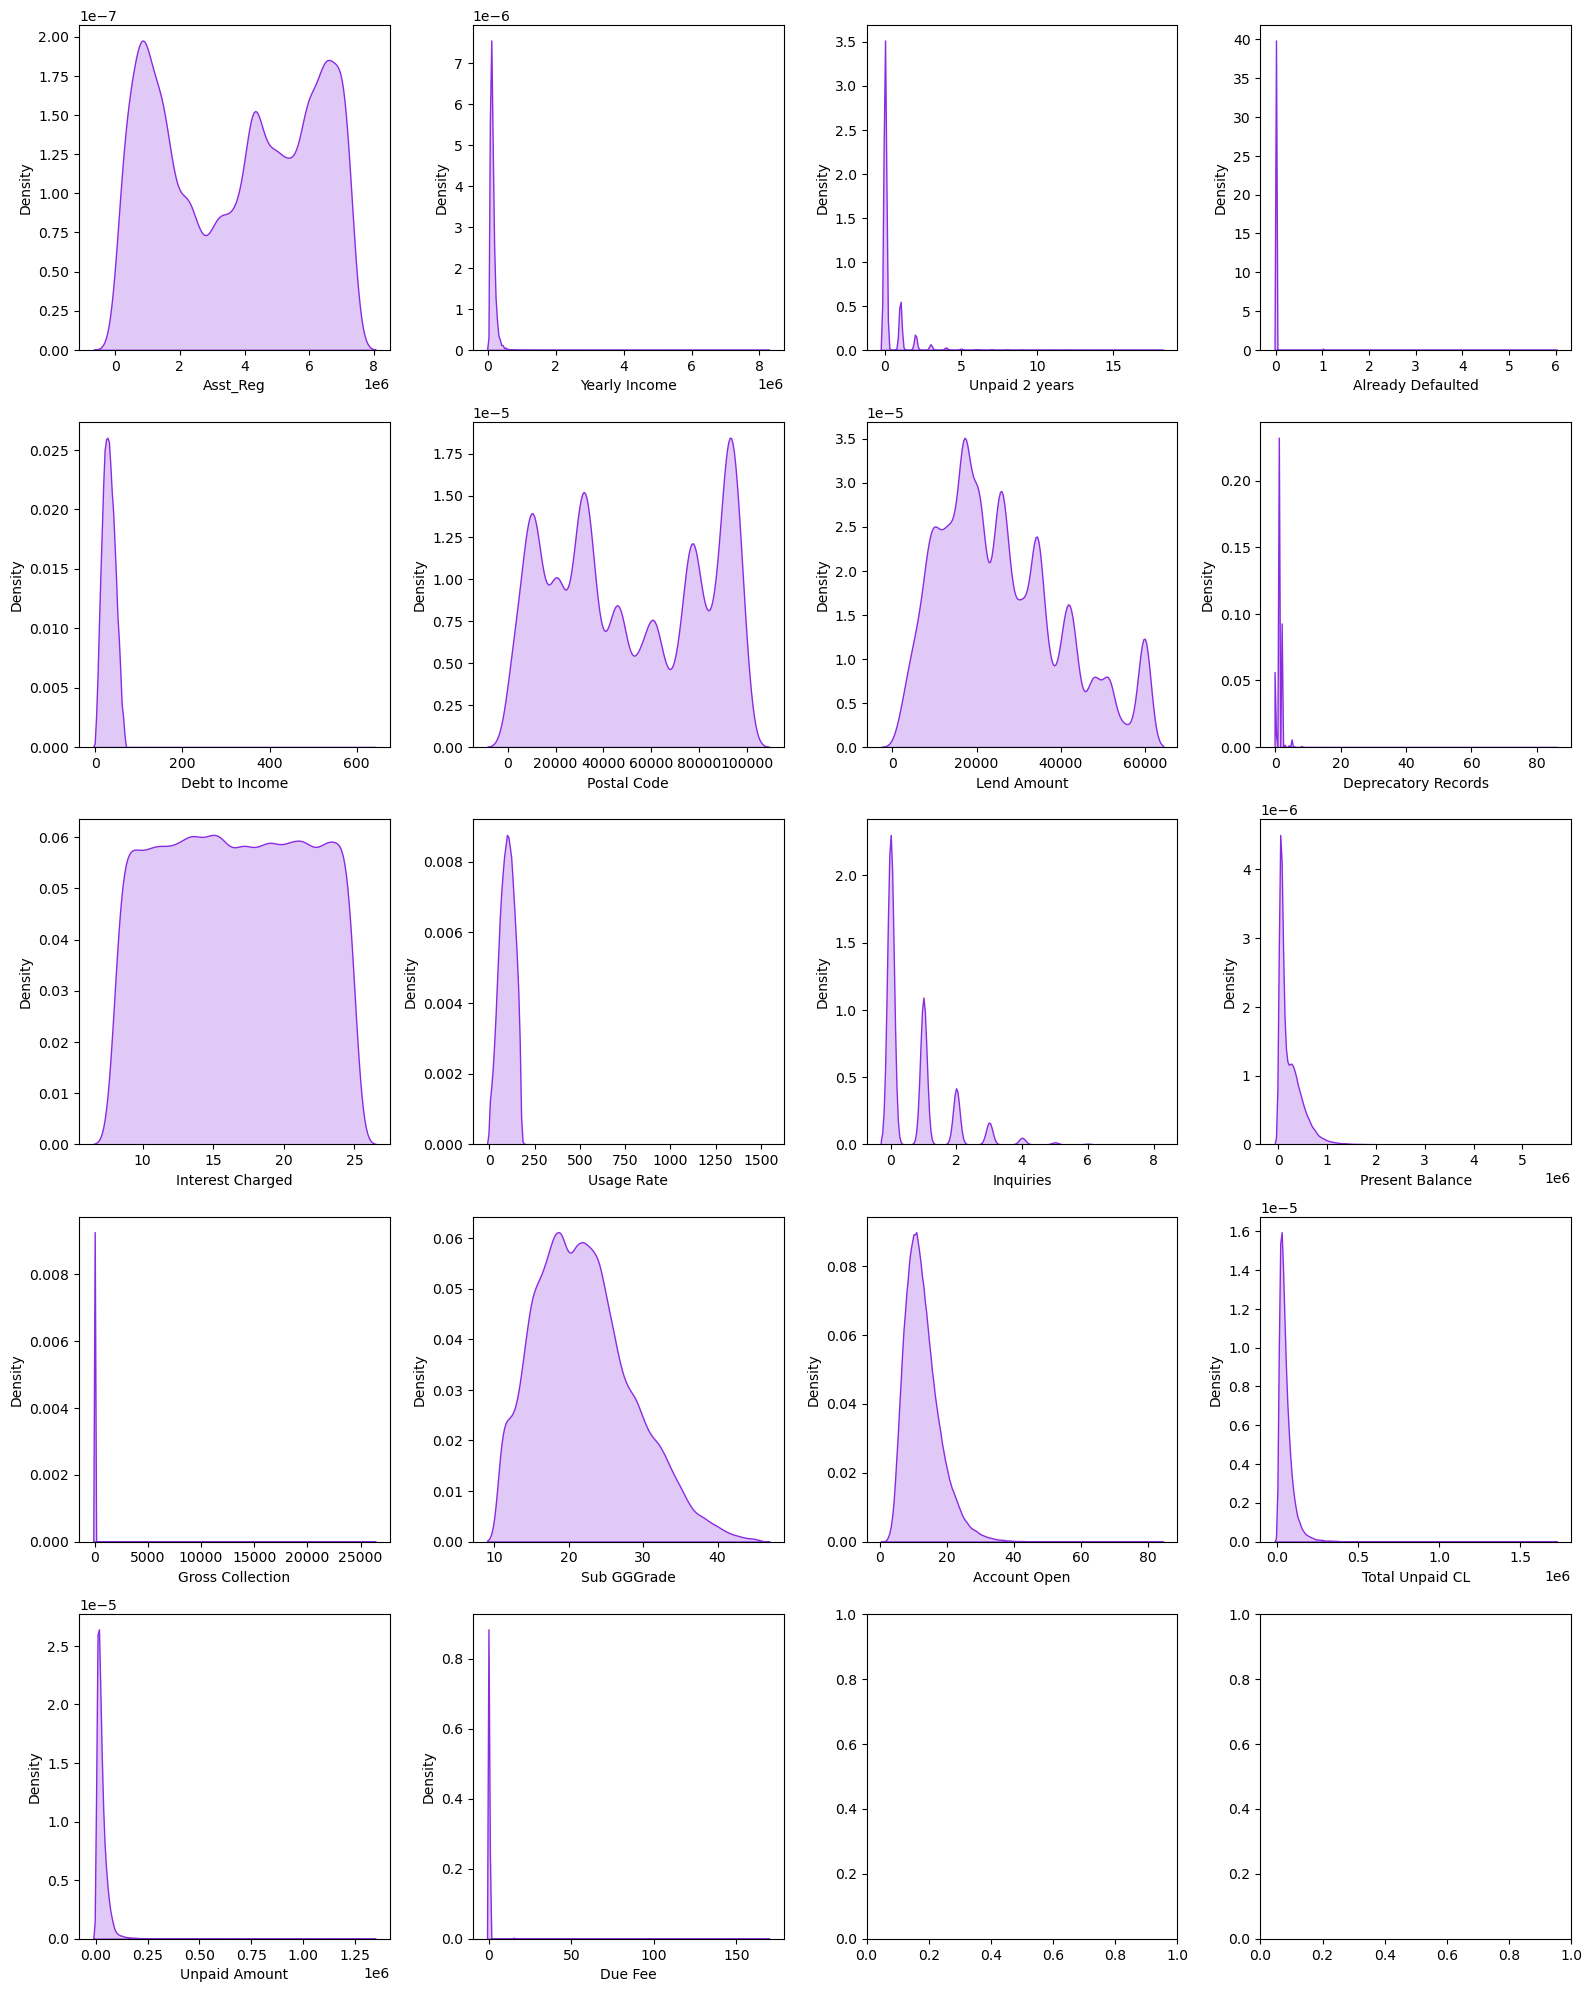

In [21]:
fig,ax = plt.subplots(5,4,figsize=(16,20))
for c,a in zip(data_num.columns,ax.flatten()):
    sns.kdeplot(data_num[c],ax=a,fill='aliceblue',color='blueviolet')
plt.tight_layout(pad=1)
plt.show()

#### UNIQUE VALUES

In [22]:
for i in data.columns:
    print(i,'-','Unique value count :',data[i].nunique())
    print(data[i].unique())
    print('---------------------------------------------------------------------------------------------------')

ID - Unique value count : 87500
[ 95074 134131  92602 ... 102153 115343 104968]
---------------------------------------------------------------------------------------------------
Asst_Reg - Unique value count : 83966
[ 421802 3964312 4247560 ... 2624710 5966919 6637289]
---------------------------------------------------------------------------------------------------
GGGrade - Unique value count : 7
['II' 'IV' 'III' 'V' 'VII' 'VI' 'I']
---------------------------------------------------------------------------------------------------
Experience - Unique value count : 11
['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']
---------------------------------------------------------------------------------------------------
Validation - Unique value count : 3
['Vfied' 'Source Verified' 'Not Vfied']
---------------------------------------------------------------------------------------------------
Yearly Income - Unique value count : 6871
[633600.    85483.2  

##### <font color='Blue'>INFERENCE :</font>
* There are anomalies found in some columns like - 'Home Status' , 'Validation' , 'Experience' , 'State' , 'Reason'
* The columns ID , Designation seem to have lot of unique values and wont contribute much in getting useful insights so they can be dropped.

In [23]:
# Dropping unwanted columns from dataset
data.drop(['ID','Designation','Postal Code'],axis=1,inplace=True)

In [24]:
data_cat.drop(['Designation','State'],axis=1,inplace=True)

In [25]:
data.head(2)

,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,421802,II,>10yrs,Vfied,633600.0,MOR??AGE,0,0,12.5496,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,3964312,IV,7yrs,Source Verified,85483.2,REN?,0,0,9.0048,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0


#### Duplicate values

In [26]:
data[data.duplicated()]

,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan


##### <font color='Blue'>INFERENCE :</font>
* There are no duplicate records in the dataset

###### =========================================================================================================

#### CHECKING FOR CORRELATION

In [27]:
data_num.corr()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
Asst_Reg,1.000000,0.035298,0.034842,0.011144,0.088523,-0.014156,0.035463,0.060083,-0.003918,-0.074356,-0.109052,0.010265,-0.111597,-0.027765,0.055217,0.059253,0.031855,-0.064833
Yearly Income,0.035298,1.000000,0.048105,0.015212,-0.217565,-0.003886,0.379753,-0.006023,0.000878,0.046539,0.042901,0.480756,0.011979,-0.087292,0.147274,0.342919,0.346428,0.010316
Unpaid 2 years,0.034842,0.048105,1.000000,0.139225,-0.017023,-0.030558,-0.012538,-0.013911,0.000769,-0.018248,0.032898,0.064146,0.000142,0.058871,0.044931,-0.048703,-0.034495,0.020816
Already Defaulted,0.011144,0.015212,0.139225,1.000000,0.000945,-0.008595,0.000148,0.000338,-0.002908,-0.031001,-0.003279,0.020608,-0.000966,0.029875,0.015250,0.009123,0.001204,0.011485
Debt to Income,0.088523,-0.217565,-0.017023,0.000945,1.000000,0.004370,0.032461,-0.051685,-0.002211,0.162391,-0.004063,-0.009076,0.008508,0.175669,0.292328,0.084394,0.138476,-0.000393
Postal Code,-0.014156,-0.003886,-0.030558,-0.008595,0.004370,1.000000,-0.005100,-0.008839,0.001059,0.013406,0.007374,-0.008646,0.009521,-0.006331,-0.050865,-0.034395,-0.025425,-0.005567
Lend Amount,0.035463,0.379753,-0.012538,0.000148,0.032461,-0.005100,1.000000,-0.080907,-0.002999,0.115829,-0.030195,0.323443,0.070179,0.144200,0.180107,0.356740,0.343999,0.036821
Deprecatory Records,0.060083,-0.006023,-0.013911,0.000338,-0.051685,-0.008839,-0.080907,1.000000,0.002984,-0.080653,0.072078,-0.065633,-0.010535,0.051904,-0.024598,-0.116259,-0.095573,-0.005655
Interest Charged,-0.003918,0.000878,0.000769,-0.002908,-0.002211,0.001059,-0.002999,0.002984,1.000000,-0.000879,-0.001635,-0.003021,-0.003095,-0.005658,0.001527,0.005934,0.003211,-0.001339
Usage Rate,-0.074356,0.046539,-0.018248,-0.031001,0.162391,0.013406,0.115829,-0.080653,-0.000879,1.000000,-0.089634,0.080913,0.026460,0.229003,-0.157274,-0.132994,0.222095,0.024016


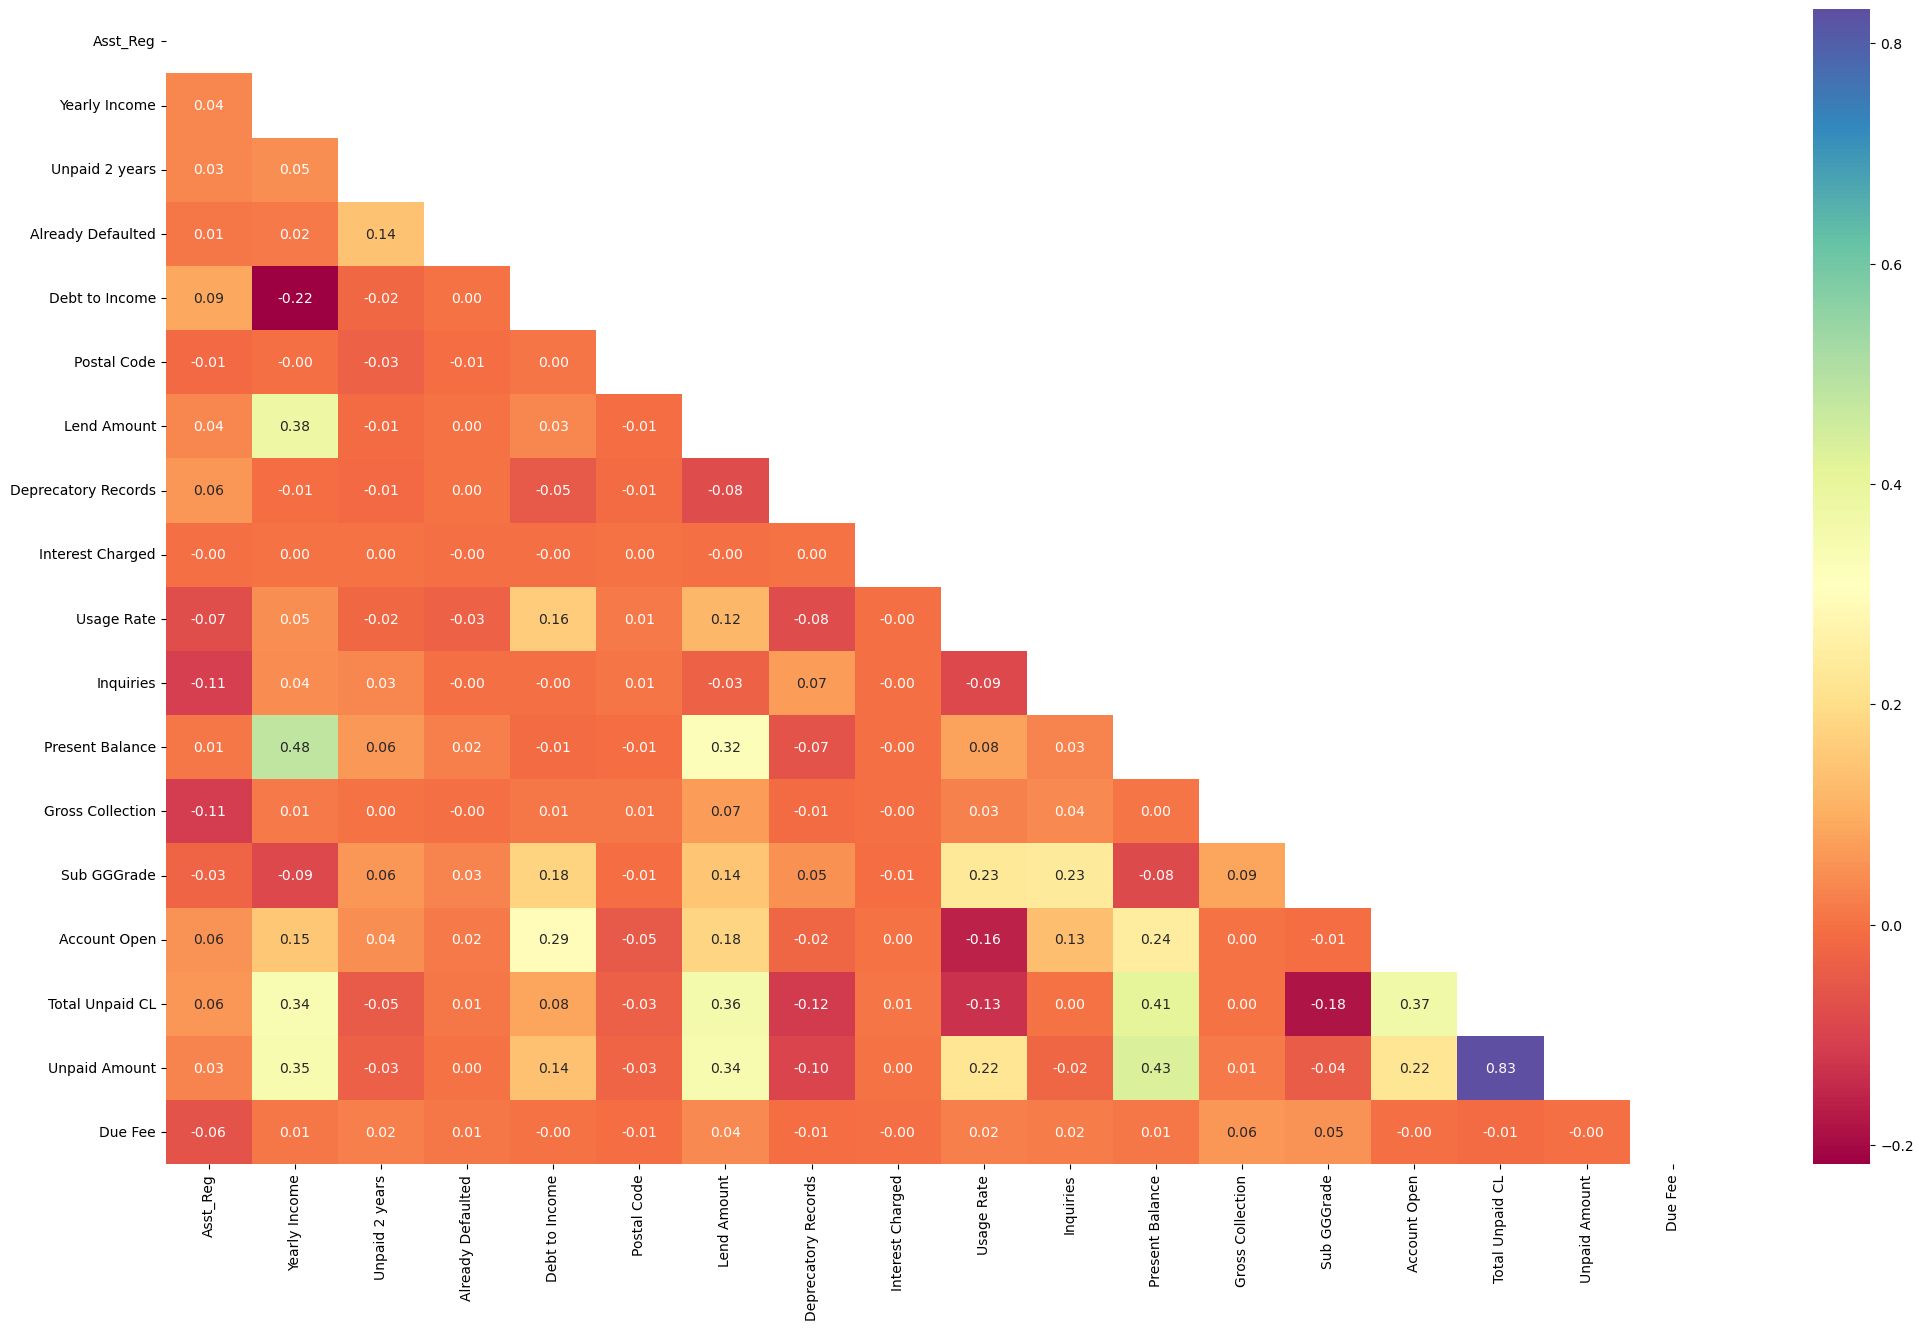

In [28]:
plt.figure(figsize = (25,15))
sns.heatmap(data_num.corr(),annot = True,fmt = '.2f',cmap = 'Spectral',mask = np.triu(data_num.corr()))
plt.show()

##### <font color='Blue'>INFERENCE :</font>
* Unpaid Amount and Total Unpaid CL are strongly positively correlated to each other
* Present Balance and Yearly Income are positively correlated

###### =========================================================================================================

#### CHECKING FOR NULL VALUES

In [29]:
# Total Null values present in the dataset
print('Count :',data.isnull().sum().sum())
print('Percentage :',data.isnull().sum().sum()/data.size*100)

Count : 18102
Percentage : 0.7662222222222222


In [30]:
# Count of null values present in columns
data.isnull().sum().sort_values(ascending = False)

Yearly Income          5575
Unpaid Amount          4852
Total Unpaid CL        4186
Debt to Income         3489
Asst_Reg                  0
Gross Collection          0
Due Fee                   0
Claim Type                0
Reason                    0
Duration                  0
Account Open              0
State                     0
File Status               0
Sub GGGrade               0
Inquiries                 0
Present Balance           0
GGGrade                   0
Usage Rate                0
Interest Charged          0
Deprecatory Records       0
Lend Amount               0
Already Defaulted         0
Unpaid 2 years            0
Home Status               0
Validation                0
Experience                0
Loan/No Loan              0
dtype: int64

In [31]:
# Percentage of null values present in columns
(data.isnull().sum()/len(data)*100).sort_values(ascending = False)

Yearly Income          6.371429
Unpaid Amount          5.545143
Total Unpaid CL        4.784000
Debt to Income         3.987429
Asst_Reg               0.000000
Gross Collection       0.000000
Due Fee                0.000000
Claim Type             0.000000
Reason                 0.000000
Duration               0.000000
Account Open           0.000000
State                  0.000000
File Status            0.000000
Sub GGGrade            0.000000
Inquiries              0.000000
Present Balance        0.000000
GGGrade                0.000000
Usage Rate             0.000000
Interest Charged       0.000000
Deprecatory Records    0.000000
Lend Amount            0.000000
Already Defaulted      0.000000
Unpaid 2 years         0.000000
Home Status            0.000000
Validation             0.000000
Experience             0.000000
Loan/No Loan           0.000000
dtype: float64

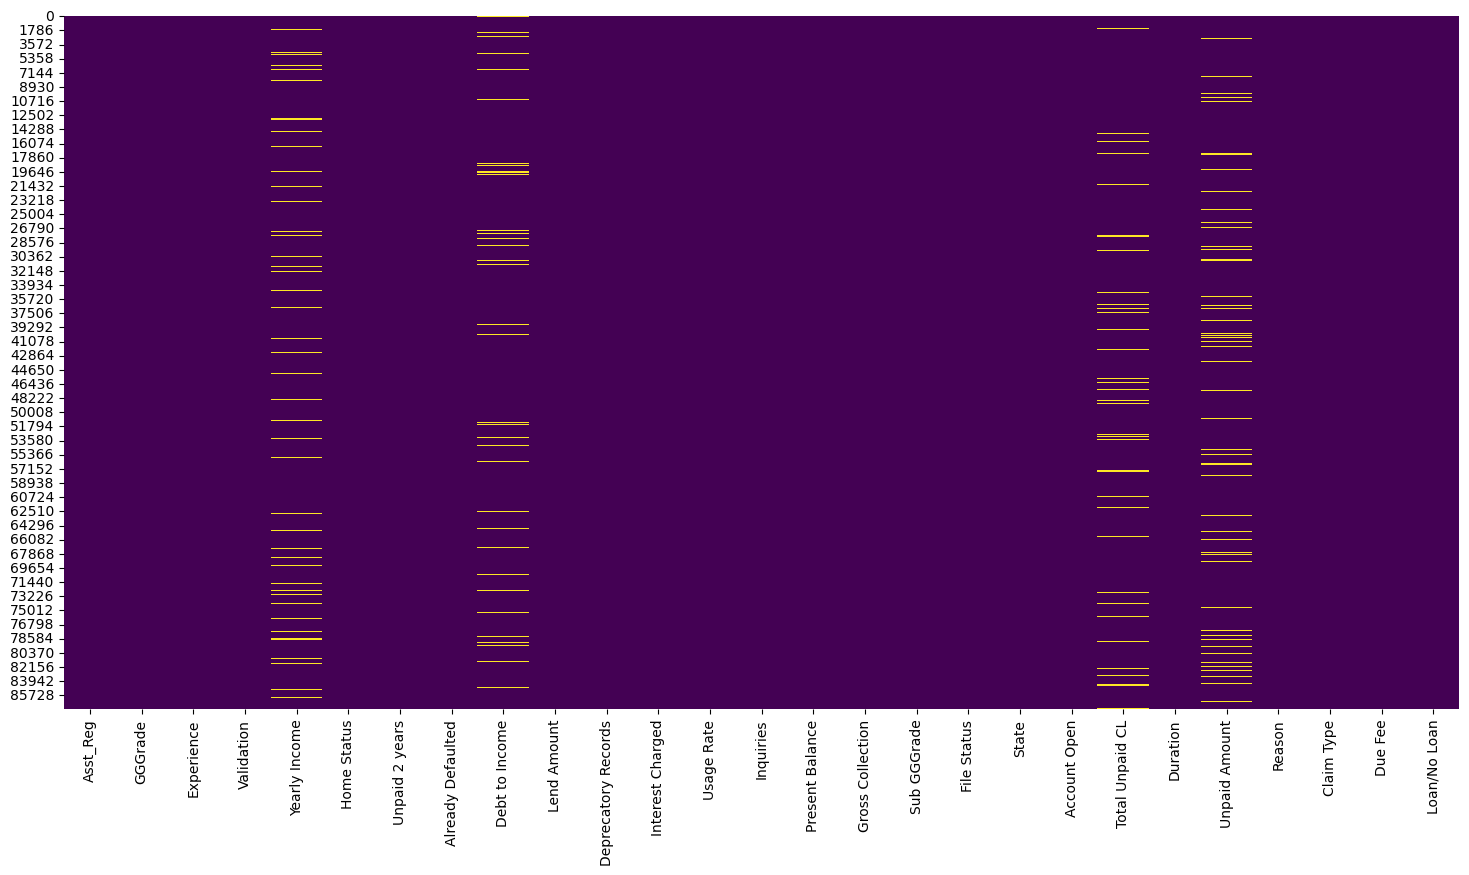

In [32]:
# Visualising the presence of null-values using heatmap
plt.figure(figsize = (18,9))
sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False)
plt.show()

##### <font color='Blue'>INFERENCE :</font>
* There are Null Values present in Yearly Income, Debt To Income, Total Unpaid CL, Unpaid Amount, Postal Code
    * Yearly Income   :   6.37%
    * Debt to Income  :   3.98%
    * Total Unpaid CL :   4.78%/
    * Unpaid Amount   :   5.54%
    * Postal Code     :   1.51%

###### =========================================================================================================

#### CHECKING OUTLIER PRESENCE

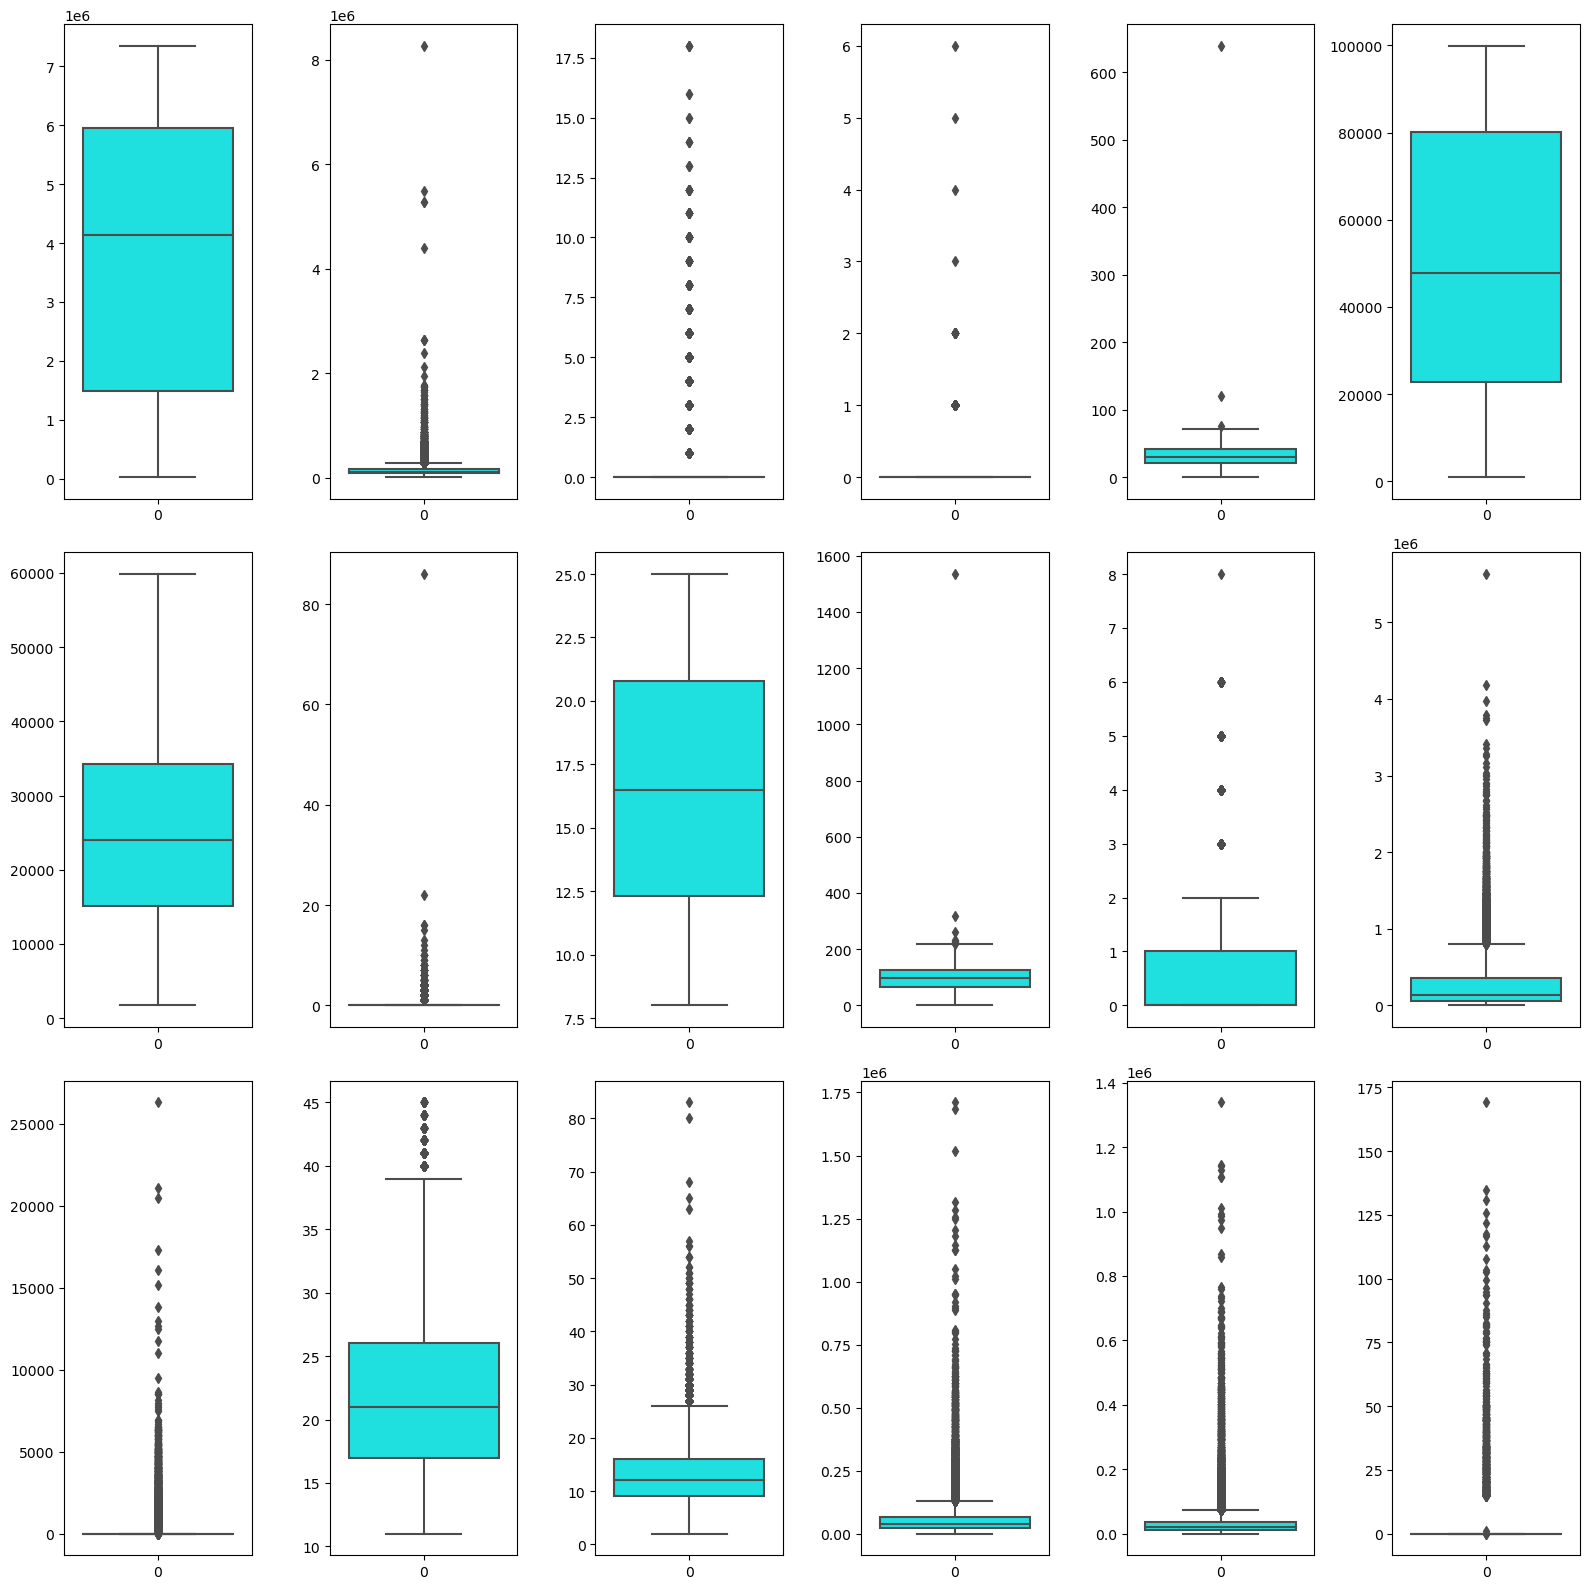

In [33]:
fig,ax = plt.subplots(3,6,figsize = (16,16))
for i,a in zip(data_num.columns,ax.flatten()):
    sns.boxplot(data_num[i],ax = a,color='cyan')
plt.tight_layout()
plt.show()

##### <font color='Blue'>INFERENCE :</font>
* There are Outliers present in the all the columns in the upper range
* Columns : Unpaid 2 years, Due Fees, Deprecatory Records, Gross Collection, Already Defaulted
    
**If we see boxplot above , the box is built at 0 or very close to 0. If we capped the data it is highly possible that the capping will make all the values to 0**

###### =========================================================================================================

#### DATA ANALYSIS USING VISUALISATION

#### UNIVARIATE ANALYSIS

##### Understanding Numerical Column distribution using Visualisation

In [34]:
# sns.pairplot(data_num)

##### Understanding Target Variable distribution using Visualisation

In [35]:
data['Loan/No Loan'].value_counts()

Loan/No Loan
0    70988
1    16512
Name: count, dtype: int64

In [36]:
data['Loan/No Loan'].value_counts(normalize=True).round(2)*100

Loan/No Loan
0    81.0
1    19.0
Name: proportion, dtype: float64

<Axes: >

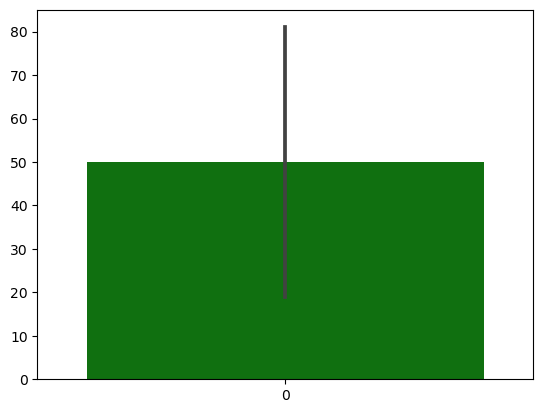

In [37]:
sns.barplot(data['Loan/No Loan'].value_counts(normalize=True).round(2)*100,color='Green')

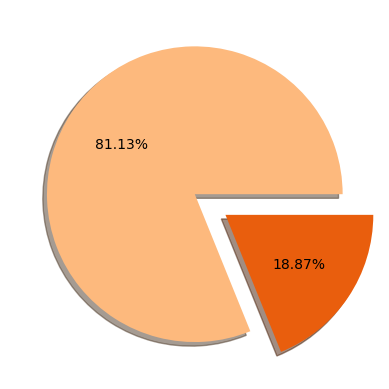

In [38]:
palette = sns.color_palette("Oranges", n_colors=len(data['Loan/No Loan'].value_counts(normalize=True).round(2)*100))
plt.pie(data['Loan/No Loan'].value_counts(),autopct='%.2f%%',explode=[0,0.25],shadow=True,colors=palette)
plt.show()

##### <font color='Blue'>INFERENCE :</font>
* 81.13% of data are of class 1 label and rest 18.87% are of class 1 label
 

##### Understanding Categorical Column distribution using Visualisation

GGGrade
II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: count, dtype: int64


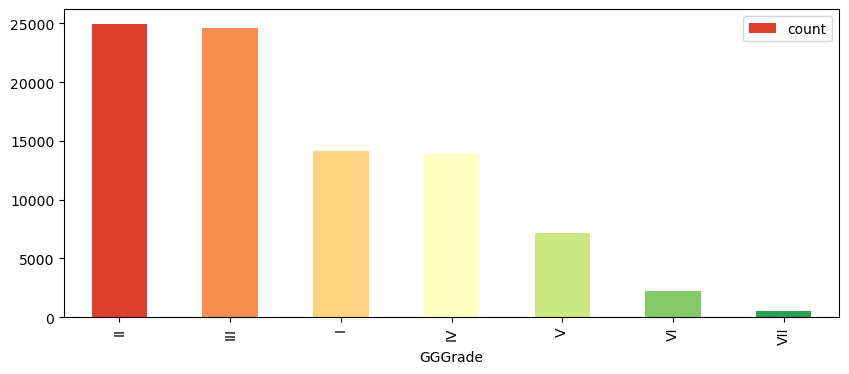

Experience
>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: count, dtype: int64


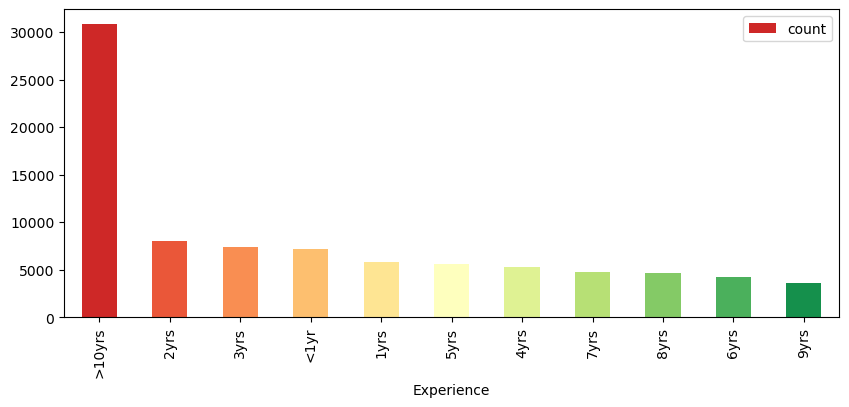

Validation
Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: count, dtype: int64


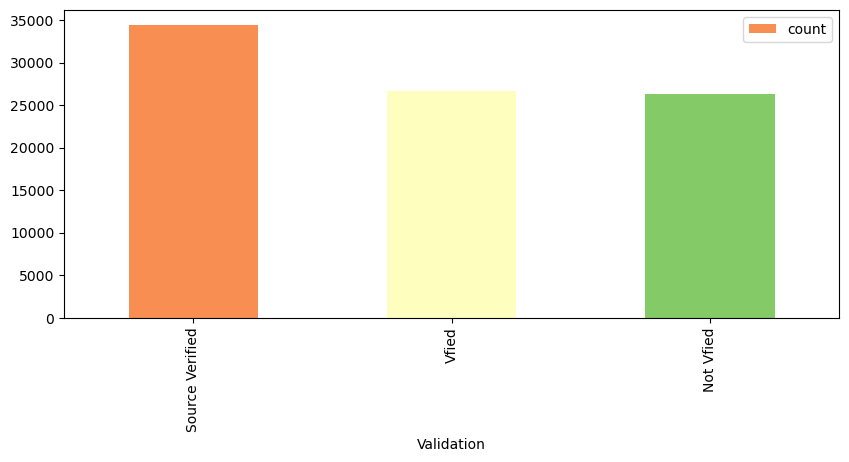

Home Status
MOR??AGE    44160
REN?        34914
OWN          8416
OTHER           6
NONE            4
Name: count, dtype: int64


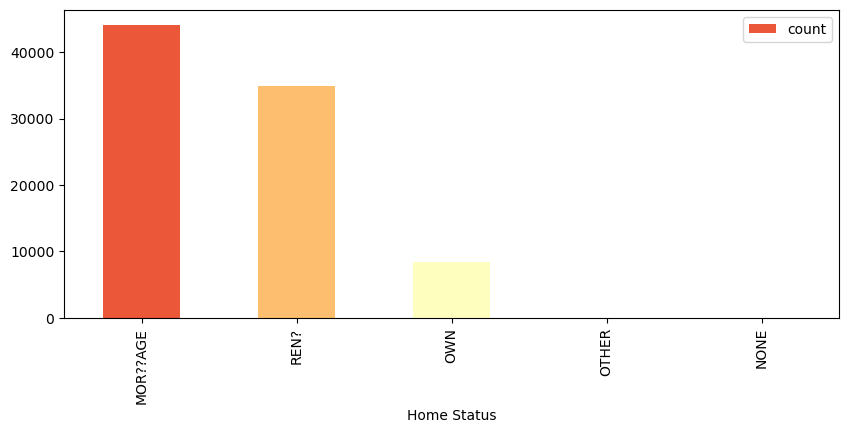

File Status
whole         46300
fully paid    41200
Name: count, dtype: int64


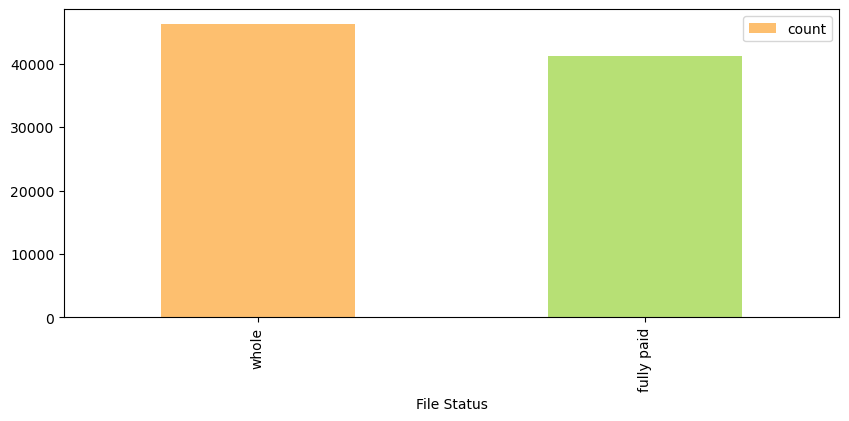

Duration
3 years    60061
5 years    27439
Name: count, dtype: int64


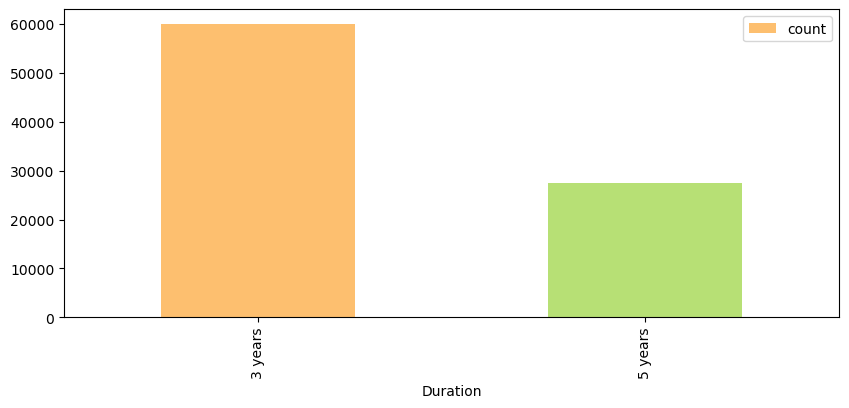

Reason
debt  consolidation    52559
credit  card           21102
home  improvement       4886
other                   3774
major  purchase         1512
medical                  821
small  business          751
car                      710
moving                   503
vacation                 424
house                    311
wedding                  109
renewable  energy         38
Name: count, dtype: int64


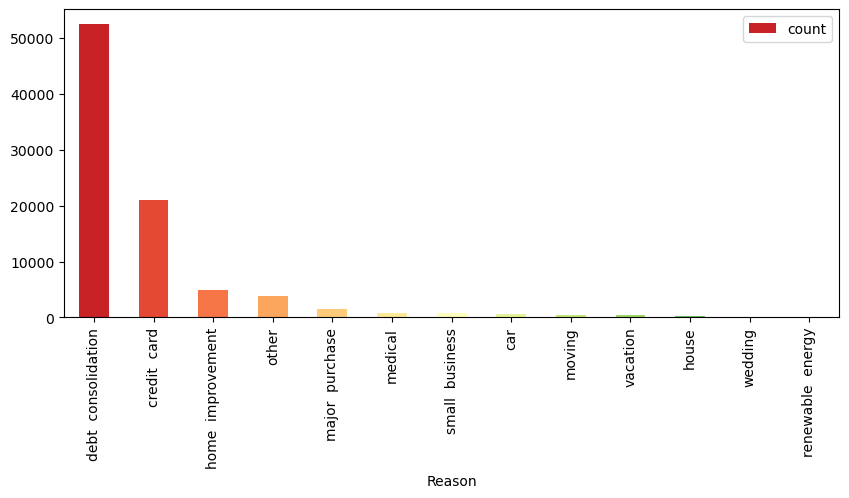

Claim Type
I    87454
J       46
Name: count, dtype: int64


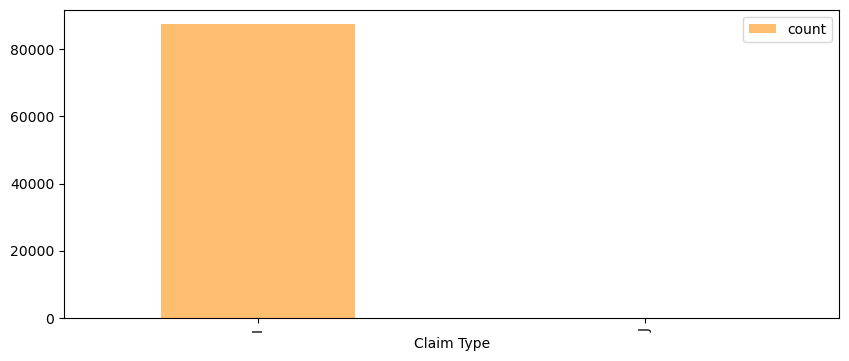

In [39]:
for i in data_cat.columns:
    print('==================================================================================================================')
    print(data_cat[i].value_counts())
    plt.figure(figsize=(10,4))
    bar_palette = sns.color_palette("RdYlGn", len(data_cat[i].value_counts()))
    data_cat[i].value_counts().plot(kind='bar',color=bar_palette)
    plt.legend()
    plt.show()

##### <font color='Blue'>INFERENCE :</font>
* From the Visualisation :
    * it can be seen that most type of Claim are Individual type
    * it can be seen that the major reasons for loan application are debt consolidation and credit card
    * the count of number of applications for duration 3 years is almost twice as that 5 years
    * initially we can see most applications for loan are from the state of California
    * The home status of major applicants is either MORTGAGE or RENT
    * about 50% of applicants have experience of over 10 Years
    * about 50% + applicants lie in the top 3 GGGrade categories considering them to be trustworthy

GGGrade
II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: count, dtype: int64


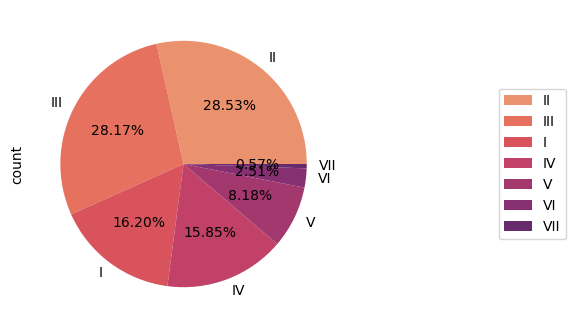

Experience
>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: count, dtype: int64


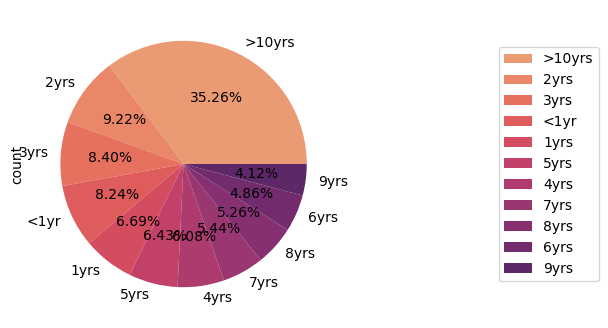

Validation
Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: count, dtype: int64


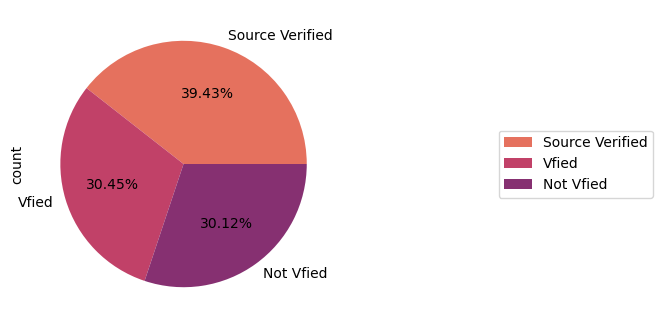

Home Status
MOR??AGE    44160
REN?        34914
OWN          8416
OTHER           6
NONE            4
Name: count, dtype: int64


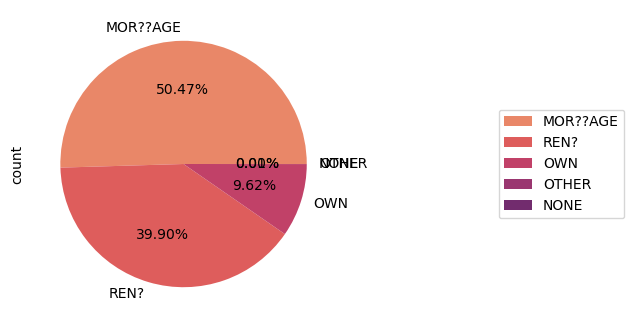

File Status
whole         46300
fully paid    41200
Name: count, dtype: int64


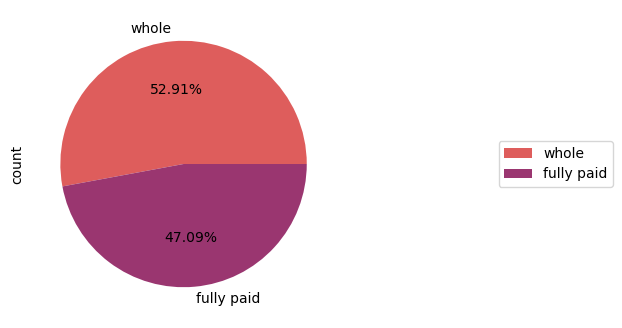

Duration
3 years    60061
5 years    27439
Name: count, dtype: int64


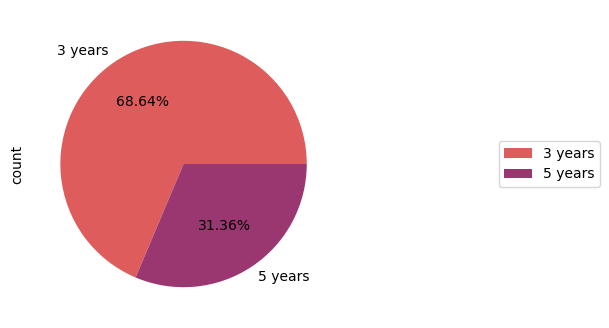

Reason
debt  consolidation    52559
credit  card           21102
home  improvement       4886
other                   3774
major  purchase         1512
medical                  821
small  business          751
car                      710
moving                   503
vacation                 424
house                    311
wedding                  109
renewable  energy         38
Name: count, dtype: int64


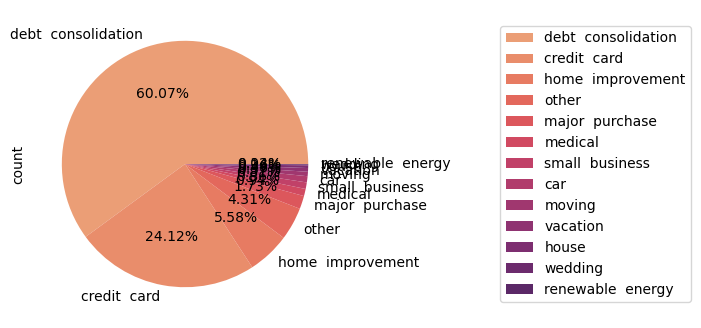

Claim Type
I    87454
J       46
Name: count, dtype: int64


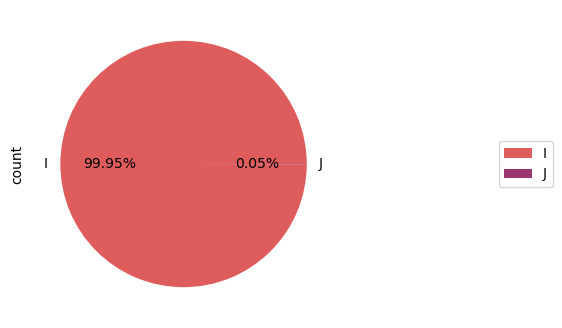

In [40]:
for i in data_cat.columns:
    print('==================================================================================================================')
    print(data_cat[i].value_counts())
    plt.figure(figsize=(12,4))
    pie_palette = sns.color_palette("flare", len(data_cat[i].value_counts()))
    pie_plot = data_cat[i].value_counts().plot(kind='pie',autopct='%.2f%%',colors=pie_palette)
    plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
    plt.show()

#### BIVARIATE ANALYSIS

#### CATEGORICAL VS CATEGORICAL columns

In [41]:
from scipy.stats import chi2_contingency
target_var = data['Loan/No Loan']
results = {}
    
for c in data_cat:
        table = pd.crosstab(data[c],data['Loan/No Loan'])
        chi2, p, dof, expected = chi2_contingency(table)
        results[c] = {'Chi-stat ': chi2, 'p-value': p}
        print(' Variable: {} \n Chi2-statistic: {} \n p-value: {}'.format(c,chi2.round(2),p))
        print('---------------------------------------------------------------------------------------------------------')

 Variable: GGGrade 
 Chi2-statistic: 124.19 
 p-value: 2.144329159989683e-24
---------------------------------------------------------------------------------------------------------
 Variable: Experience 
 Chi2-statistic: 103.69 
 p-value: 9.923109817794896e-18
---------------------------------------------------------------------------------------------------------
 Variable: Validation 
 Chi2-statistic: 682.04 
 p-value: 7.901712747516952e-149
---------------------------------------------------------------------------------------------------------
 Variable: Home Status 
 Chi2-statistic: 73.08 
 p-value: 5.073302694937398e-15
---------------------------------------------------------------------------------------------------------
 Variable: File Status 
 Chi2-statistic: 1792.13 
 p-value: 0.0
---------------------------------------------------------------------------------------------------------
 Variable: Duration 
 Chi2-statistic: 905.06 
 p-value: 7.782945756987817e-199
---------

##### <font color='Blue'>INFERENCE :</font>

* GGGrade:
    * Chi2: 124.19
    * p-value: 2.14e-24
    * There is a very strong as/sociation between 'GGGrade' and the target variable. The p-value is extremely small, indicating that the relationship is statistically significant.
---------------------------------------------------------------------------------------------------------
* Experience:
    * Chi2: 103.69
    * p-value: 9.92e-18
    * There is a very strong association between 'Experience' and the target variable. The extremely small p-value indicates a statistically significant relationship.
---------------------------------------------------------------------------------------------------------
* Validation:
    * Chi2: 682.04
    * p-value: 7.90e-149
    * 'Validation' has a very strong and statistically significant association with the target variable, as indicated by the extremely small p-value.
---------------------------------------------------------------------------------------------------------    
* Home Status:
    * Chi2: 73.08
    * p-value: 5.07e-15
    * There is a strong and statistically significant association between 'Home Status' and the target variable, as indicated by the very small p-value.
---------------------------------------------------------------------------------------------------------
* File Status:
    * Chi2: 1792.13
    * p-value: 0.0
    * There is an extremely strong association between 'File Status' and the target variable. The p-value is effectively zero, indicating a highly significant relationship.
---------------------------------------------------------------------------------------------------------
* Duration:
    * Chi2: 905.06
    * p-value: 7.78e-199
    * 'Duration' has a very strong and statistically significant association with the target variable, as indicated by the extremely small p-value.
---------------------------------------------------------------------------------------------------------
* Reason:
    * Chi2: 213.96
    * p-value: 4.23e-39
    * There is a very strong and statistically significant association between 'Reason' and the target variable, as indicated by the extremely small p-value.
---------------------------------------------------------------------------------------------------------
* Claim Type:
    * Chi2: 9.51
    * p-value: 0.002
    * There is a statistically significant association between 'Claim Type' and the target variable. The p-value is small, indicating a significant relationship.
---------------------------------------------------------------------------------------------------------
* General Inference:All the categorical variables analyzed show a statistically significant association with the target variable. The Chi-Square statistics and the corresponding p-values indicate that the relationships are strong and not due to random chance. Variables like 'File Status,' 'Validation,' and 'Duration' have particularly high Chi-Square values, suggesting very strong associations with the target variable. Even the variable with the smallest Chi-Square value ('Claim Type') still shows a statistically significant association.

------------------------------------------ GGGrade -------------------------------------------------------
Loan/No Loan      0     1
GGGrade                  
I             11508  2663
II            19761  5205
III           20226  4426
IV            11263  2604
V              6023  1131
VI             1808   384
VII             399    99


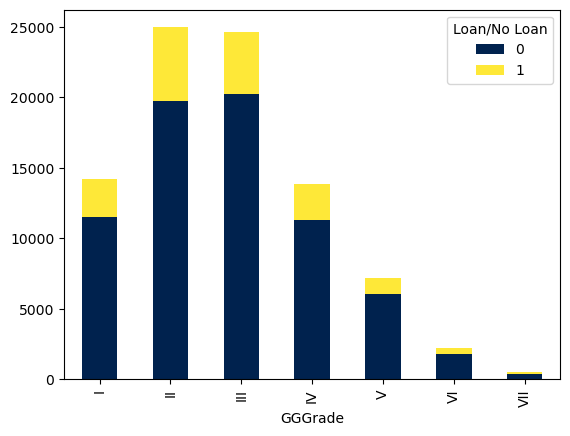

------------------------------------------ Experience -------------------------------------------------------
Loan/No Loan      0     1
Experience               
1yrs           4803  1050
2yrs           6509  1555
3yrs           6009  1341
4yrs           4344   980
5yrs           4524  1099
6yrs           3286   969
7yrs           3708  1054
8yrs           3748   856
9yrs           2885   722
<1yr           5940  1269
>10yrs        25232  5617


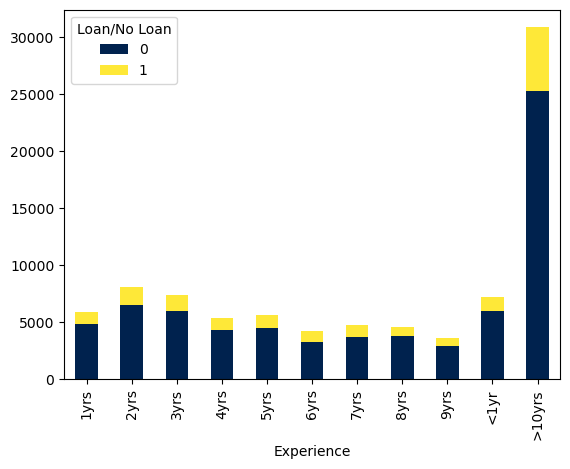

------------------------------------------ Validation -------------------------------------------------------
Loan/No Loan         0     1
Validation                  
Not Vfied        20644  5710
Source Verified  29470  5034
Vfied            20874  5768


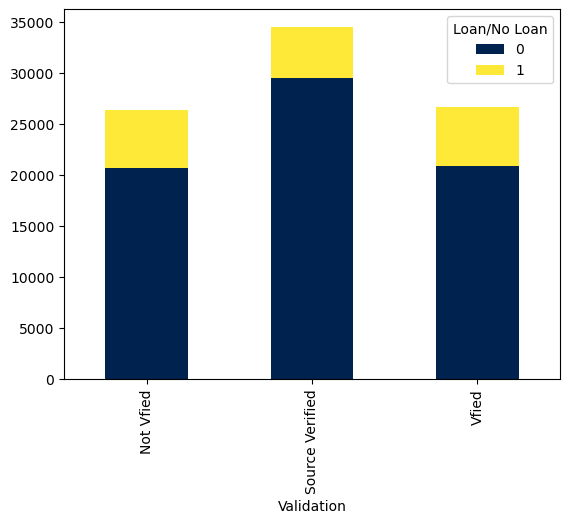

------------------------------------------ Home Status -------------------------------------------------------
Loan/No Loan      0     1
Home Status              
MOR??AGE      35472  8688
NONE              0     4
OTHER             2     4
OWN            6993  1423
REN?          28521  6393


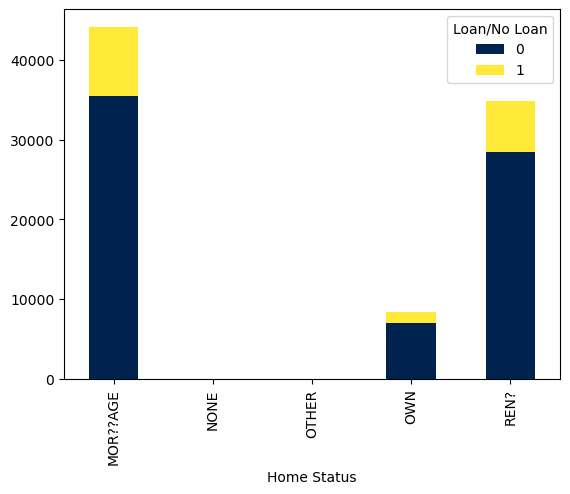

------------------------------------------ File Status -------------------------------------------------------
Loan/No Loan      0      1
File Status               
fully paid    30979  10221
whole         40009   6291


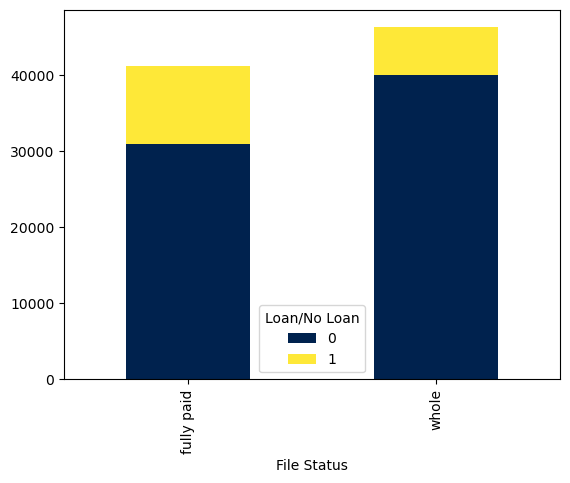

------------------------------------------ Duration -------------------------------------------------------
Loan/No Loan      0      1
Duration                  
3 years       47111  12950
5 years       23877   3562


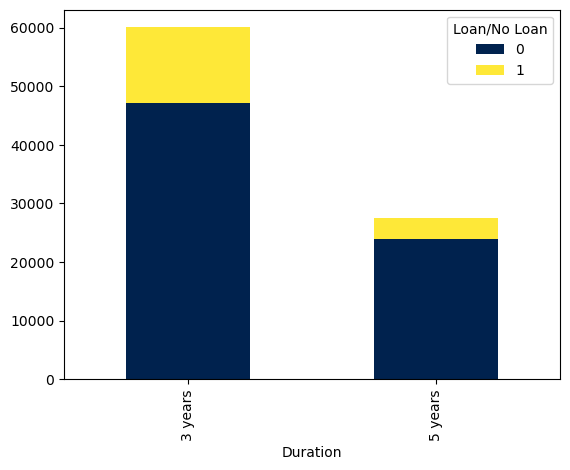

------------------------------------------ Reason -------------------------------------------------------
Loan/No Loan             0      1
Reason                           
car                    550    160
credit  card         17477   3625
debt  consolidation  42405  10154
home  improvement     3926    960
house                  215     96
major  purchase       1221    291
medical                660    161
moving                 408     95
other                 3102    672
renewable  energy       24     14
small  business        606    145
vacation               350     74
wedding                 44     65


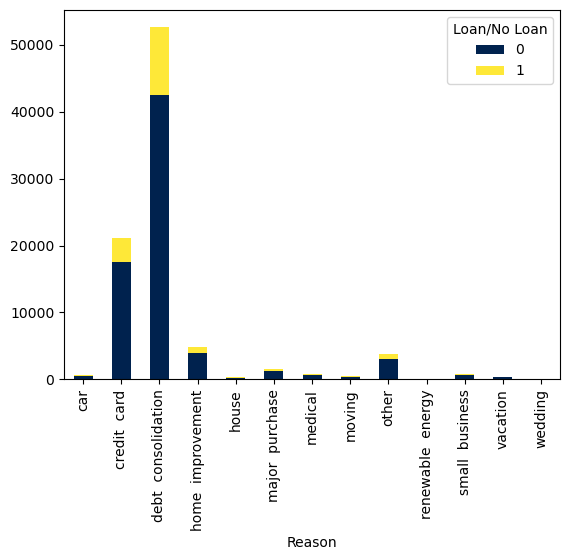

------------------------------------------ Claim Type -------------------------------------------------------
Loan/No Loan      0      1
Claim Type                
I             70942  16512
J                46      0


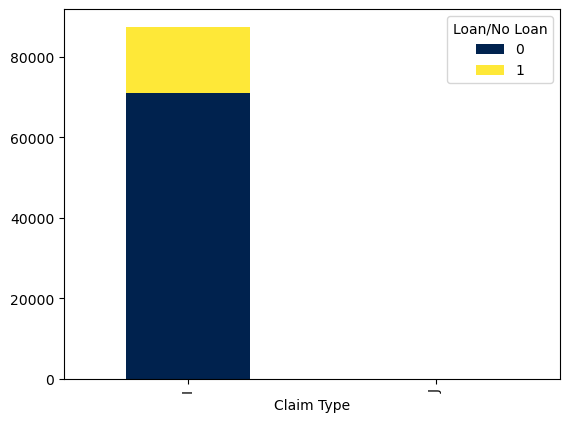

In [42]:
# Visualising from the above Statistics
for c in data_cat:
    print('------------------------------------------',c,'-------------------------------------------------------')
    table = pd.crosstab(data[c],data['Loan/No Loan'])
    print(table)
    table.plot(kind='bar',stacked=True,colormap='cividis')
    plt.show()

##### <font color='Blue'>INFERENCE :</font>

* GGGrade:
    * Grade II and Grade III have most number of records covered while Grade I and Grade IV have almost similar distribution of records
---------------------------------------------------------------------------------------------------------
* Experience:
    * A clear trend can be seen that individuals with more than 10 years of experience are significantly more likely to have a loan compared to those with fewer years of experience.
---------------------------------------------------------------------------------------------------------
* Validation:
    * The table and chart indicates that individuals with Verified validation status have the highest number of loans among all validation statuses.
---------------------------------------------------------------------------------------------------------    
* Home Status:
    * The majority of individuals with loans live in rented homes (REN?) or have mortgages (MOR??AGE), with very few loans among those with "NONE" or "OTHER" home statuses.
---------------------------------------------------------------------------------------------------------
* File Status:
    * A higher proportion of loans are associated with individuals whose file status is "fully paid" suggesting that individuals with fully paid files are more likely to have loans.
---------------------------------------------------------------------------------------------------------    
* Duration:
    * Loans are more common for individuals with a 3-year loan duration compared to those with a 5-year duration, indicating a preference or higher likelihood for shorter loan terms.
---------------------------------------------------------------------------------------------------------
* Reason:
    * The primary reasons for loans are debt consolidation and credit card repayment, with debt consolidation having the highest number of loans, indicating that these are the most common financial needs driving individuals to seek loans.
---------------------------------------------------------------------------------------------------------
* Claim Type:
    * The vast majority of loans are associated with Claim Type "I". It is risky to lend loans with claim type "J" as not even a single load with this claim type is approved 
---------------------------------------------------------------------------------------------------------

#### NUMERICAL VS CATEGORICAL columns

#### Normality Test

In [43]:
from scipy.stats import anderson
results = []
for c in data_num.columns:
    ad_stat, critical_values, significance_level = anderson(data_num[c].dropna(), dist = 'norm')
    # Check if the test statistic is greater than the critical value at the 5% significance level
    ad_test_result = ad_stat > critical_values[2]  # critical value for 5% significance level
    results.append({
        'Column': c,
        'Anderson-Darling Statistic': ad_stat,
        'Critical Value (5%)': critical_values[2],
        'Significance Level': significance_level[2],
        'Normality (at 5% level)': 'Not Normal' if ad_test_result else 'Normal'})
pd.DataFrame(results)

,Column,Anderson-Darling Statistic,Critical Value (5%),Significance Level,Normality (at 5% level)
0,Asst_Reg,2143.262740,0.787,5.0,Not Normal
1,Yearly Income,4995.164077,0.787,5.0,Not Normal
2,Unpaid 2 years,18865.896767,0.787,5.0,Not Normal
3,Already Defaulted,33551.390442,0.787,5.0,Not Normal
4,Debt to Income,176.795300,0.787,5.0,Not Normal
5,Postal Code,2216.107435,0.787,5.0,Not Normal
6,Lend Amount,1175.201262,0.787,5.0,Not Normal
7,Deprecatory Records,21073.780293,0.787,5.0,Not Normal
8,Interest Charged,955.846972,0.787,5.0,Not Normal
9,Usage Rate,215.977379,0.787,5.0,Not Normal


#### Variance Test

In [44]:
data.columns

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Validation', 'Yearly Income',
       'Home Status', 'Unpaid 2 years', 'Already Defaulted', 'Debt to Income',
       'Lend Amount', 'Deprecatory Records', 'Interest Charged', 'Usage Rate',
       'Inquiries', 'Present Balance', 'Gross Collection', 'Sub GGGrade',
       'File Status', 'State', 'Account Open', 'Total Unpaid CL', 'Duration',
       'Unpaid Amount', 'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

In [45]:
data_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'Account Open', 'Total Unpaid CL',
       'Unpaid Amount', 'Due Fee'],
      dtype='object')

In [46]:
from scipy.stats import levene
# data_num = data.drop(columns=['Loan/No Loan'])

levene_results = {}

for column in data_num.columns:
    if column in data.columns:
        group0 = data[data['Loan/No Loan'] == 0][column].dropna()
        group1 = data[data['Loan/No Loan'] == 1][column].dropna()
        stat, p_value = levene(group0, group1)
        variance_homogeneity = 'Equal' if p_value > 0.05 else 'Not Equal'
        levene_results[column] = {
            'Levene Statistic': stat,
            'p-value': p_value,
            'Variance Homogeneity': variance_homogeneity
        }
    else:
        print(f"Column '{column}' not found in the DataFrame.")
levene_df = pd.DataFrame(levene_results).T
levene_df

Column 'Postal Code' not found in the DataFrame.


,Levene Statistic,p-value,Variance Homogeneity
Asst_Reg,3513.63985,0.0,Not Equal
Yearly Income,13.495349,0.000239,Not Equal
Unpaid 2 years,78.93138,0.0,Not Equal
Already Defaulted,5.934047,0.014853,Not Equal
Debt to Income,121.551985,0.0,Not Equal
Lend Amount,112.248242,0.0,Not Equal
Deprecatory Records,38.649964,0.0,Not Equal
Interest Charged,0.182352,0.669361,Equal
Usage Rate,16.244801,0.000056,Not Equal
Inquiries,510.624125,0.0,Not Equal


##### <font color='Blue'>INFERENCE :</font>
* None of the columns in the dataset exhibit a normal distribution based on the Anderson-Darling test at a 5% significance level.
* All variables show significant deviations from normality, indicating the need for non-parametric statistical methods or data transformations for accurate analysis.
* Equal variances: Only "Interest Charged" has equal variances between the "Loan/No Loan" groups.
* Not equal variances: All other columns have significantly different variances between the "Loan/No Loan" groups. This indicates that the variability in these features is different depending on whether or not the loan was taken.

#### Mannwhitneyu Test

In [47]:
print("Null Hypothesis (H0): The medians of the numerical column are equal across all categories of 'Loan/No Loan'")
print("Alternative Hypothesis (H1): At least one group (category of 'Loan/No Loan') has a different median than the others")

Null Hypothesis (H0): The medians of the numerical column are equal across all categories of 'Loan/No Loan'
Alternative Hypothesis (H1): At least one group (category of 'Loan/No Loan') has a different median than the others


In [48]:
from scipy.stats import mannwhitneyu
data_temp = data.copy().dropna()
data_temp_num = data_temp.select_dtypes(exclude = object)
data_temp_cat = data_temp.select_dtypes(include = object)
data_temp_num.drop('Loan/No Loan',axis = 1,inplace = True)

target_variable = 'Loan/No Loan'
group1 = data_temp[data_temp[target_variable] == 0]
group2 = data_temp[data_temp[target_variable] == 1]

mannwhitney_results = {}

for column in data_temp_num.columns:
    if column != target_variable:
        stat, p_value = mannwhitneyu(group1[column], group2[column])
        mannwhitney_results[column] = {
            'Mann-Whitney U Statistic': stat, 
            'p-value': p_value,
            'Significance': 'Significant' if p_value < 0.05 else 'Not Significant'}

mannwhitney_df = pd.DataFrame(mannwhitney_results).T
mannwhitney_df

,Mann-Whitney U Statistic,p-value,Significance
Asst_Reg,618816113.5,0.0,Significant
Yearly Income,378502229.0,0.014225,Significant
Unpaid 2 years,395889914.5,0.0,Significant
Already Defaulted,384076048.5,0.174366,Not Significant
Debt to Income,431936671.0,0.0,Significant
Lend Amount,417075305.0,0.0,Significant
Deprecatory Records,387919748.0,0.001743,Significant
Interest Charged,380075200.5,0.086933,Not Significant
Usage Rate,400252251.0,0.0,Significant
Inquiries,346114741.5,0.0,Significant


##### <font color='Blue'>INFERENCE :</font>
- Most of the variables show significant differences between the groups, except for Already Defaulted and Interest Charged.
- In short, this means that the variables which show significant difference are important and affect the analysis.

###### =========================================================================================================

In [49]:
# Making a copy of original dataframe and accordingly making changes 
df = data.copy()
df_num = data_num.copy()
df_cat = data_cat.copy()

###### =========================================================================================================

#### TREATING ANAMOLIES

##### Treating GGGrade column 

GGGrade
II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: count, dtype: int64


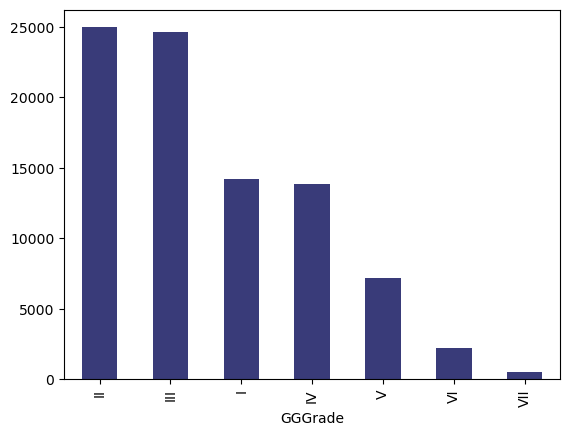

In [50]:
print(df['GGGrade'].value_counts())
df['GGGrade'].value_counts().plot(kind='bar',colormap='tab20b')
plt.show()

In [51]:
df['GGGrade'] = df['GGGrade'].replace({'I':'1','II':'2','III':'3','IV':'4','V':'5','VI':'6','VII':'7'})

In [52]:
df['GGGrade'].value_counts()

GGGrade
2    24966
3    24652
1    14171
4    13867
5     7154
6     2192
7      498
Name: count, dtype: int64

In [53]:
df['GGGrade'].dtypes

dtype('O')

##### Treating State Column

In [54]:
df['State'].unique()

array(['California', 'NC', 'Florida', 'NewJersey', 'LA', 'TX', 'CT', 'MI',
       'OR', 'AR', 'Newyork', 'MT', 'CO', 'Ohio', 'NM', 'MN', 'GA', 'WA',
       'Maryland', 'AL', 'SC', 'PA', 'AZ', 'UT', 'MA', 'VA', 'IL', 'WI',
       'NV', 'HI', 'RI', 'TN', 'OK', 'VT', 'IN', 'AK', 'MO', 'NE', 'NH',
       'DC', 'WV', 'MS', 'KY', 'KS', 'DE', 'ND', 'SD', 'WY', 'ME'],
      dtype=object)

In [55]:
df['State'] = df['State'].replace({'California':'CL','Florida':'Fl','Ohio':'O','NewJersey':'NJ','Maryland':'ML','Newyork':'NY'})

##### Treating Validation column 

In [56]:
df['Validation'].unique()

array(['Vfied', 'Source Verified', 'Not Vfied'], dtype=object)

In [57]:
df['Validation'] = df['Validation'].replace({'Vfied':'Verified','Not Vfied':'Not Verified','Source Verified':'Verified'})

In [58]:
df['Validation'].unique()

array(['Verified', 'Not Verified'], dtype=object)

##### Treating Home Status column

In [59]:
df['Home Status'].unique()

array(['MOR??AGE', 'REN?', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [60]:
df["Home Status"] = df['Home Status'].replace({'MOR??AGE':'MORTGAGE','REN?':'RENT'})

In [61]:
df['Home Status'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

##### Treating Reason column

In [62]:
df['Reason'].unique()

array(['debt  consolidation', 'major  purchase', 'other', 'credit  card',
       'car', 'home  improvement', 'small  business', 'moving',
       'vacation', 'medical', 'wedding', 'house', 'renewable  energy'],
      dtype=object)

In [63]:
df['Reason'] = df['Reason'].apply(lambda x: ' '.join(x.split()))

# lambda x: is used to simplify the code to a single liner
# x = 'hello  this   is world  speaking'
# x.split() -> returns ['hello','this','is','world','speaking']
# ' '.join  -> combines the output of x.split() with a single whitespace

In [64]:
df['Reason'].unique()

array(['debt consolidation', 'major purchase', 'other', 'credit card',
       'car', 'home improvement', 'small business', 'moving', 'vacation',
       'medical', 'wedding', 'house', 'renewable energy'], dtype=object)

In [65]:
# Checking if Anamolies are properly treated or not

unique = ['GGGrade','Validation','Home Status','State','Reason']
for i in unique:
    print('---------------------Column:',i,'---------------------')
    print(df[i].unique())
    print(df[i].dtypes)

---------------------Column: GGGrade ---------------------
['2' '4' '3' '5' '7' '6' '1']
object
---------------------Column: Validation ---------------------
['Verified' 'Not Verified']
object
---------------------Column: Home Status ---------------------
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
object
---------------------Column: State ---------------------
['CL' 'NC' 'Fl' 'NJ' 'LA' 'TX' 'CT' 'MI' 'OR' 'AR' 'NY' 'MT' 'CO' 'O' 'NM'
 'MN' 'GA' 'WA' 'ML' 'AL' 'SC' 'PA' 'AZ' 'UT' 'MA' 'VA' 'IL' 'WI' 'NV'
 'HI' 'RI' 'TN' 'OK' 'VT' 'IN' 'AK' 'MO' 'NE' 'NH' 'DC' 'WV' 'MS' 'KY'
 'KS' 'DE' 'ND' 'SD' 'WY' 'ME']
object
---------------------Column: Reason ---------------------
['debt consolidation' 'major purchase' 'other' 'credit card' 'car'
 'home improvement' 'small business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable energy']
object


###### =========================================================================================================

#### TREATING NULL VALUES

###### Treating Yearly Income column

In [66]:
data_temp = data.copy().dropna()
# Data_temp is created only for this particular code 
kruskal_result = {}
kruskal_results = []

for i in data_cat.columns:
    groups = [data_temp[data_temp[i] == category]['Yearly Income'] for category in data_temp[i].unique()]
    stat, p_value = kruskal(*groups)
    kruskal_result = {
        'Category': i,
        'Kruskal-Wallis Statistic': stat,
        'p-value': p_value,
        'Significance': 'Significant' if p_value < 0.05 else 'Not Significant'
    }
    kruskal_results.append(kruskal_result)

# Convert the results to a DataFrame
df_kruskal = pd.DataFrame(kruskal_results)
df_kruskal.sort_values(by = 'Kruskal-Wallis Statistic',ascending = False)

,Category,Kruskal-Wallis Statistic,p-value,Significance
3,Home Status,4868.780623,0.000000e+00,Significant
0,GGGrade,1717.231886,0.000000e+00,Significant
1,Experience,1288.877929,9.614564e-271,Significant
2,Validation,1082.717081,7.779882e-236,Significant
5,Duration,1065.358872,1.116981e-233,Significant
6,Reason,546.736285,2.456233e-109,Significant
4,File Status,250.988128,1.581323e-56,Significant
7,Claim Type,8.664051,3.245489e-03,Significant


##### <font color='Blue'>INFERENCE :</font>
- Using Krushkal-Wallis test to validate above, as various categories contain 2 or more than 2 unique elements
- From the above Krushkal-Wallis test we validated whether Experience column is significant for null value imputation in Yearly Income column

In [67]:
income_experience_wise = df.groupby('Experience')['Yearly Income'].mean()

In [68]:
df['Yearly Income'] = df['Yearly Income'].fillna(df['Experience'].map(income_experience_wise))

In [69]:
df['Yearly Income'].isnull().sum()

0

###### Treating Total Unpaid CL column

In [70]:
df['Total Unpaid CL'].skew()

5.9062439684985275

<Axes: xlabel='Total Unpaid CL', ylabel='Density'>

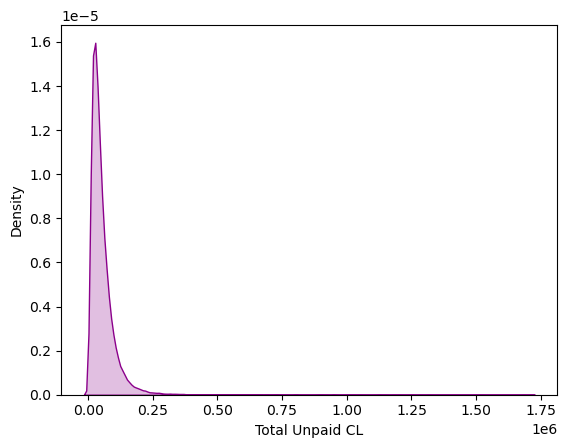

In [71]:
sns.kdeplot(df['Total Unpaid CL'],color='darkmagenta',fill='purple')

In [72]:
df['Total Unpaid CL'] = df['Total Unpaid CL'].fillna(df['Total Unpaid CL'].median())

##### <font color='Blue'>INFERENCE :</font>
* As from above visualisation we see that there is skewness present so Median is appropriate for Null-value Imputation

###### Treating Unpaid Amount column

In [73]:
df['Unpaid Amount'].skew()

8.868174107786146

<Axes: xlabel='Unpaid Amount', ylabel='Density'>

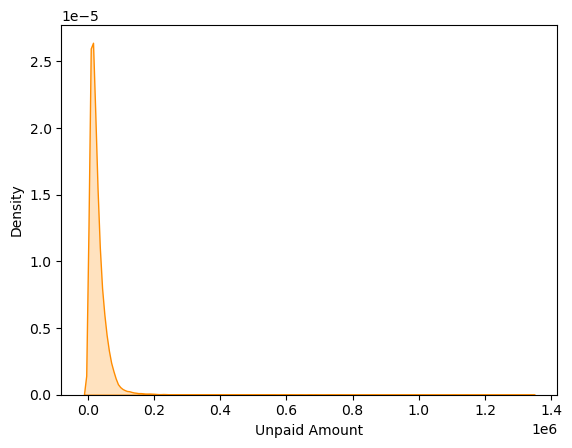

In [74]:
sns.kdeplot(df['Unpaid Amount'],color='darkorange',fill='purple')

In [75]:
df['Unpaid Amount'] = df['Unpaid Amount'].fillna(df['Unpaid Amount'].median())

##### <font color='Blue'>INFERENCE :</font>
* As from above visualisation we see that there is skewness present so Median is appropriate for Null-value Imputation

###### Treating Debt To Income

In [76]:
df["Debt to Income"].skew()

1.1694895194004058

<Axes: xlabel='Debt to Income', ylabel='Density'>

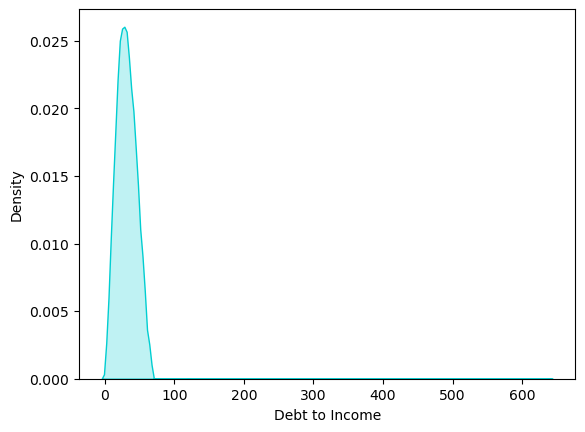

In [77]:
sns.kdeplot(df['Debt to Income'],color='darkturquoise',fill='purple')

In [78]:
df['Debt to Income'] = df['Debt to Income'].fillna(df['Debt to Income'].median())

##### <font color='Blue'>INFERENCE :</font>
* As from above visualisation we see that there is skewness present so Median is appropriate for Null-value Imputation

In [79]:
# Checking if all the null values are treated properly
df.isnull().sum()

Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [80]:
# Separating the numeric and categorical columns
df_num=df.select_dtypes(exclude=object).drop('Loan/No Loan',axis=1)
df_cat=df.select_dtypes(include=object)

###### =========================================================================================================

#### TREATING OUTLIERS (CAPPING)

In [81]:
def outlier(x):
    if x < ll:
        return ll
    elif x > ul:
        return ul
    else:
        return x

df_num.drop(['Unpaid 2 years','Already Defaulted','Deprecatory Records','Gross Collection','Due Fee'],axis = 1,inplace = True)
# Dropping above list of columns because If we see boxplot above , the box is built at 0 or very close to 0. 
# If we capped the data it is highly possible that the capping will make all the values to 0

for i in df_num.columns:
    q1 = df_num[i].quantile(0.25)
    q3 = df_num[i].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    df_num[i] = df_num[i].apply(outlier)

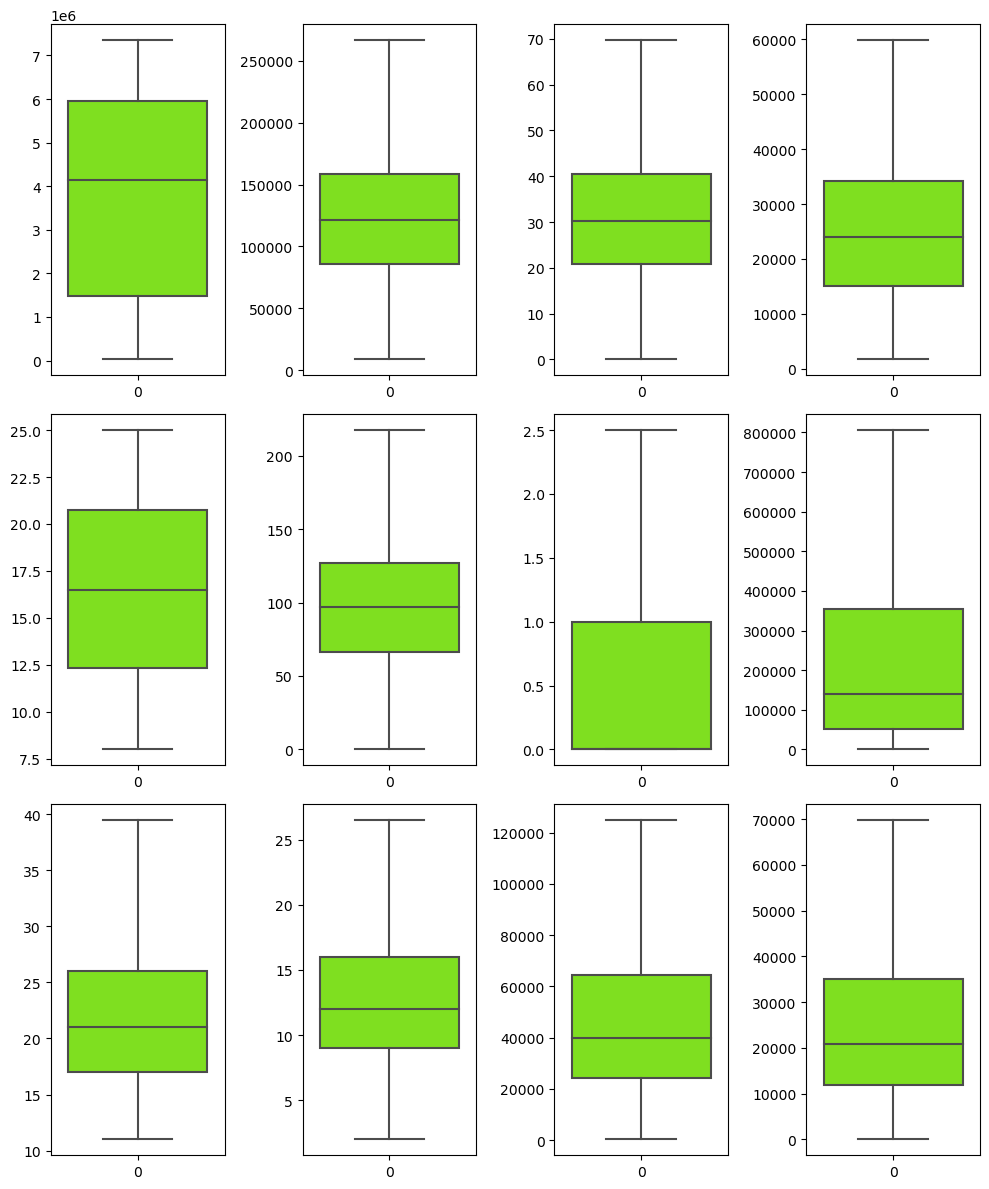

In [82]:
fig,ax = plt.subplots(3,4,figsize = (10,12))
for i,a in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = a,color='chartreuse')
plt.tight_layout()
plt.show()

###### =========================================================================================================

#### SCALING

In [83]:
df_merge = df[['Unpaid 2 years','Already Defaulted','Deprecatory Records','Gross Collection','Due Fee']]

In [84]:
df_num = pd.concat([df_num,df_merge],axis = 1)

In [85]:
mm = MinMaxScaler()
df_scaled = pd.DataFrame(mm.fit_transform(df_num),columns = df_num.columns)
df_scaled

,Asst_Reg,Yearly Income,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Unpaid 2 years,Already Defaulted,Deprecatory Records,Gross Collection,Due Fee
0,0.054177,1.000000,0.179957,0.693382,0.434706,0.409019,1.0,0.753222,0.280702,0.612245,0.467688,0.447120,0.0,0.0,0.000000,0.0,0.0
1,0.537664,0.297406,0.129126,0.626471,0.114118,0.473101,0.0,0.334001,0.666667,0.530612,0.149234,0.167018,0.0,0.0,0.000000,0.0,0.0
2,0.576322,0.273038,0.357263,0.264706,0.844118,0.277690,0.0,0.027884,0.491228,0.204082,0.122585,0.080753,0.0,0.0,0.000000,0.0,0.0
3,0.023520,0.204778,0.237774,0.058824,0.138824,0.534810,0.4,0.018909,0.385965,0.285714,0.177215,0.223548,0.0,0.0,0.000000,0.0,0.0
4,0.630795,0.229809,0.574319,0.308824,0.334118,0.585443,0.4,0.081175,0.736842,0.326531,0.286476,0.393504,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,0.615687,0.259386,0.277042,0.147059,0.020588,0.234968,0.4,0.018733,0.210526,0.408163,0.259827,0.143406,0.0,0.0,0.000000,0.0,0.0
87496,0.354833,0.316567,0.700072,0.441176,0.951765,0.594146,0.0,0.127544,0.596491,0.857143,0.255829,0.356961,0.0,0.0,0.000000,0.0,0.0
87497,0.810983,0.320819,0.111780,0.117647,0.178235,0.383703,0.4,0.018092,0.175439,0.244898,0.230513,0.207946,0.0,0.0,0.034884,0.0,0.0
87498,0.355646,0.204778,0.119007,0.379412,0.854118,0.261076,0.4,0.073543,0.491228,0.367347,0.197202,0.121093,0.0,0.0,0.011628,0.0,0.0


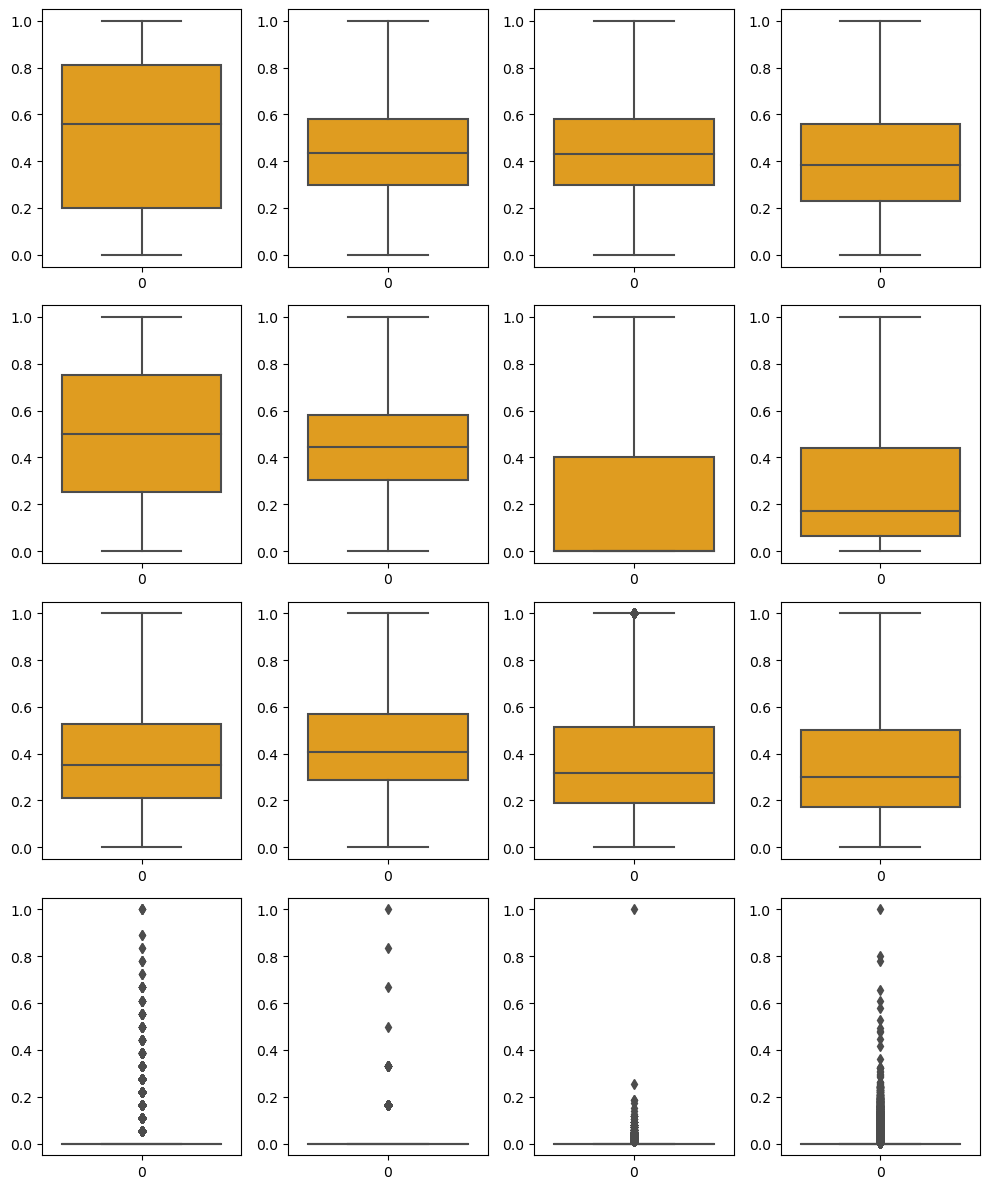

In [86]:
fig,ax = plt.subplots(4,4,figsize = (10,12))
for i,a in zip(df_scaled.columns,ax.flatten()):
    sns.boxplot(df_scaled[i],ax = a,color='orange')
plt.tight_layout()
plt.show()

###### =========================================================================================================

#### FEATURE ENGINEERING

In [87]:
df_cat['Experience'].unique()

array(['>10yrs', '7yrs', '<1yr', '2yrs', '1yrs', '4yrs', '9yrs', '6yrs',
       '5yrs', '8yrs', '3yrs'], dtype=object)

In [88]:
def func(experience_array):
    categories = []
    for exp in experience_array:
        if '>' in exp:
            categories.append('Expert')
        elif '<' in exp:
            categories.append('Fresher')
        else:
            years = int(exp[:-3])
            if 1 <= years <= 9:
                categories.append('Intermediate')
            else:
                categories.append('Expert')
    return categories

df['experience_category'] = func(df['Experience'].values)

df

,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan,experience_category
0,421802,2,>10yrs,Verified,633600.000000,MORTGAGE,0,0,12.5496,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,CL,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0,Expert
1,3964312,4,7yrs,Verified,85483.200000,RENT,0,0,9.0048,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0,Intermediate
2,4247560,3,<1yr,Verified,79200.000000,RENT,0,0,24.9144,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Fl,7,15604.0,5 years,5637.87,major purchase,I,0.0,0,Fresher
3,197179,3,<1yr,Verified,61600.000000,RENT,0,0,16.5816,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NJ,9,22410.0,3 years,15607.17,major purchase,I,0.0,1,Fresher
4,4646684,5,2yrs,Verified,68053.920000,RENT,0,0,40.0512,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,4535984,2,>10yrs,Not Verified,75680.000000,RENT,0,0,19.3200,10260.00,0,8.35,51.084,1,15100.14,0.0,17,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0,Expert
87496,2624710,4,3yrs,Verified,90423.520000,RENT,0,0,48.8208,27360.00,0,24.18,129.172,0,102811.88,0.0,28,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0,Intermediate
87497,5966919,2,>10yrs,Verified,91520.000000,MORTGAGE,0,0,7.7952,8550.00,3,11.03,83.420,1,14584.11,0.0,16,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0,Expert
87498,2630667,3,1yrs,Verified,61600.000000,MORTGAGE,0,0,8.2992,23769.00,1,22.52,56.760,1,59281.66,0.0,25,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0,Intermediate


In [89]:
df['experience_category'].unique()

array(['Expert', 'Intermediate', 'Fresher'], dtype=object)

In [90]:
df['experience_category'].value_counts(normalize = True)*100

experience_category
Intermediate    56.505143
Expert          35.256000
Fresher          8.238857
Name: proportion, dtype: float64

##### <font color='Blue'>INFERENCE :</font>
- The func function categorizes a list of experience strings into three categories: 'Expert' For experiences marked with '>' (Experience >10) 
- 'Fresher' for those marked with '<' (Experience <1)
- 'Intermediate' for experiences ranging from 1 to 9 years. 
- For experiences not fitting these criteria, it defaults to 'Expert'. 
- The function is applied to a DataFrame column, creating a new column experience_category with these classifications.
- Borrower with Experiences category wise :-
    - Intermediate : 56.5 %
    - Expert       : 35.25 %
    - Fresher      : 8.23 %

###### =========================================================================================================

#### ENCODING

In [91]:
# Dropping state column as it wont be much helpful further
df_cat.drop('State',axis = 1,inplace = True)

In [92]:
exp_cat = df['experience_category']

In [93]:
df_cat = pd.concat([df_cat,exp_cat],axis = 1)
df_cat.head()

,GGGrade,Experience,Validation,Home Status,File Status,Duration,Reason,Claim Type,experience_category
0,2,>10yrs,Verified,MORTGAGE,fully paid,3 years,debt consolidation,I,Expert
1,4,7yrs,Verified,RENT,whole,5 years,debt consolidation,I,Intermediate
2,3,<1yr,Verified,RENT,whole,5 years,major purchase,I,Fresher
3,3,<1yr,Verified,RENT,fully paid,3 years,major purchase,I,Fresher
4,5,2yrs,Verified,RENT,fully paid,5 years,debt consolidation,I,Intermediate


In [94]:
df_cat.drop('Experience',axis = 1,inplace = True)

In [95]:
df_cat['Validation'].replace({'Verified' : 1, 'Not Verified':0},inplace = True)
df_cat['Claim Type'].replace({'I': 0, 'J': 1},inplace = True)
df_cat['Duration'].replace({'3 years': 0, '5 years':1},inplace = True)
df_cat['File Status'].replace({'whole': 0, 'fully paid':1},inplace = True)
df_cat['experience_category'].replace({'Fresher':0,'Intermediate':1,'Expert':2},inplace = True)

##### Label Encoding

In [96]:
label = LabelEncoder()
df_cat['Reason'] = label.fit_transform(df_cat['Reason'])

In [97]:
# Cross Verifying

In [98]:
df['Reason'].value_counts()

Reason
debt consolidation    52559
credit card           21102
home improvement       4886
other                  3774
major purchase         1512
medical                 821
small business          751
car                     710
moving                  503
vacation                424
house                   311
wedding                 109
renewable energy         38
Name: count, dtype: int64

In [99]:
df_cat['Reason'].value_counts()

Reason
2     52559
1     21102
3      4886
8      3774
5      1512
6       821
10      751
0       710
7       503
11      424
4       311
12      109
9        38
Name: count, dtype: int64

In [100]:
label = LabelEncoder()
df_cat['Home Status'] = label.fit_transform(df_cat['Home Status'])

In [101]:
# Cross Verifying

In [102]:
df["Home Status"].value_counts()

Home Status
MORTGAGE    44160
RENT        34914
OWN          8416
OTHER           6
NONE            4
Name: count, dtype: int64

In [103]:
df_cat['Home Status'].value_counts()

Home Status
0    44160
4    34914
3     8416
2        6
1        4
Name: count, dtype: int64

In [104]:
df_cat.head()

,GGGrade,Validation,Home Status,File Status,Duration,Reason,Claim Type,experience_category
0,2,1,0,1,0,2,0,2
1,4,1,4,0,1,2,0,1
2,3,1,4,0,1,5,0,0
3,3,1,4,1,0,5,0,0
4,5,1,4,1,1,2,0,1


###### =========================================================================================================

In [105]:
df_final = pd.concat([df_scaled,df_cat],axis = 1)
df_final

,Asst_Reg,Yearly Income,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Unpaid 2 years,Already Defaulted,Deprecatory Records,Gross Collection,Due Fee,GGGrade,Validation,Home Status,File Status,Duration,Reason,Claim Type,experience_category
0,0.054177,1.000000,0.179957,0.693382,0.434706,0.409019,1.0,0.753222,0.280702,0.612245,0.467688,0.447120,0.0,0.0,0.000000,0.0,0.0,2,1,0,1,0,2,0,2
1,0.537664,0.297406,0.129126,0.626471,0.114118,0.473101,0.0,0.334001,0.666667,0.530612,0.149234,0.167018,0.0,0.0,0.000000,0.0,0.0,4,1,4,0,1,2,0,1
2,0.576322,0.273038,0.357263,0.264706,0.844118,0.277690,0.0,0.027884,0.491228,0.204082,0.122585,0.080753,0.0,0.0,0.000000,0.0,0.0,3,1,4,0,1,5,0,0
3,0.023520,0.204778,0.237774,0.058824,0.138824,0.534810,0.4,0.018909,0.385965,0.285714,0.177215,0.223548,0.0,0.0,0.000000,0.0,0.0,3,1,4,1,0,5,0,0
4,0.630795,0.229809,0.574319,0.308824,0.334118,0.585443,0.4,0.081175,0.736842,0.326531,0.286476,0.393504,0.0,0.0,0.000000,0.0,0.0,5,1,4,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,0.615687,0.259386,0.277042,0.147059,0.020588,0.234968,0.4,0.018733,0.210526,0.408163,0.259827,0.143406,0.0,0.0,0.000000,0.0,0.0,2,0,4,0,0,2,0,2
87496,0.354833,0.316567,0.700072,0.441176,0.951765,0.594146,0.0,0.127544,0.596491,0.857143,0.255829,0.356961,0.0,0.0,0.000000,0.0,0.0,4,1,4,0,1,2,0,1
87497,0.810983,0.320819,0.111780,0.117647,0.178235,0.383703,0.4,0.018092,0.175439,0.244898,0.230513,0.207946,0.0,0.0,0.034884,0.0,0.0,2,1,0,1,0,2,0,2
87498,0.355646,0.204778,0.119007,0.379412,0.854118,0.261076,0.4,0.073543,0.491228,0.367347,0.197202,0.121093,0.0,0.0,0.011628,0.0,0.0,3,1,0,0,0,2,0,1


In [106]:
data['Loan/No Loan'].value_counts()

Loan/No Loan
0    70988
1    16512
Name: count, dtype: int64

#### SMOTE

In [107]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter


# Separate features and target
X = df_final
y = data['Loan/No Loan']

# Print original class distribution
print('Original class distribution:', Counter(y))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to features and target
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print resampled class distribution
print('Resampled class distribution:', Counter(y_resampled))

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Loan/No Loan'] = y_resampled

df_resampled

Original class distribution: Counter({0: 70988, 1: 16512})
Resampled class distribution: Counter({0: 70988, 1: 70988})


,Asst_Reg,Yearly Income,Debt to Income,Lend Amount,Interest Charged,Usage Rate,Inquiries,Present Balance,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Unpaid 2 years,Already Defaulted,Deprecatory Records,Gross Collection,Due Fee,GGGrade,Validation,Home Status,File Status,Duration,Reason,Claim Type,experience_category,Loan/No Loan
0,0.054177,1.000000,0.179957,0.693382,0.434706,0.409019,1.000000,0.753222,0.280702,0.612245,0.467688,0.447120,0.000000,0.0,0.000000,0.0,0.0,2.0,1,0,1,0,2,0,2,0
1,0.537664,0.297406,0.129126,0.626471,0.114118,0.473101,0.000000,0.334001,0.666667,0.530612,0.149234,0.167018,0.000000,0.0,0.000000,0.0,0.0,4.0,1,4,0,1,2,0,1,0
2,0.576322,0.273038,0.357263,0.264706,0.844118,0.277690,0.000000,0.027884,0.491228,0.204082,0.122585,0.080753,0.000000,0.0,0.000000,0.0,0.0,3.0,1,4,0,1,5,0,0,0
3,0.023520,0.204778,0.237774,0.058824,0.138824,0.534810,0.400000,0.018909,0.385965,0.285714,0.177215,0.223548,0.000000,0.0,0.000000,0.0,0.0,3.0,1,4,1,0,5,0,0,1
4,0.630795,0.229809,0.574319,0.308824,0.334118,0.585443,0.400000,0.081175,0.736842,0.326531,0.286476,0.393504,0.000000,0.0,0.000000,0.0,0.0,5.0,1,4,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141971,0.180941,0.725670,0.196670,0.306658,0.315291,0.499493,0.249192,0.744322,0.421053,0.198732,0.283294,0.264586,0.000000,0.0,0.007244,0.0,0.0,3.0,1,0,0,0,3,0,2,1
141972,0.515373,0.329211,0.440027,0.147534,0.805420,0.422304,0.400000,0.431475,0.463694,0.445859,0.183969,0.180780,0.000000,0.0,0.009125,0.0,0.0,3.0,1,0,0,0,2,0,1,1
141973,0.346203,0.327451,0.340644,0.085426,0.160130,0.633789,0.400000,0.032203,0.613964,0.286212,0.223561,0.275241,0.000000,0.0,0.000000,0.0,0.0,4.0,0,4,0,0,2,0,1,1
141974,0.036737,0.662529,0.408443,0.735072,0.414810,0.209422,0.839697,0.451222,0.624614,0.383241,0.277531,0.126866,0.089057,0.0,0.000000,0.0,0.0,4.0,1,0,1,1,2,0,1,1


In [108]:
df_resampled['GGGrade']=df_resampled['GGGrade'].astype('int64')
df_resampled.dtypes

Asst_Reg               float64
Yearly Income          float64
Debt to Income         float64
Lend Amount            float64
Interest Charged       float64
Usage Rate             float64
Inquiries              float64
Present Balance        float64
Sub GGGrade            float64
Account Open           float64
Total Unpaid CL        float64
Unpaid Amount          float64
Unpaid 2 years         float64
Already Defaulted      float64
Deprecatory Records    float64
Gross Collection       float64
Due Fee                float64
GGGrade                  int64
Validation               int64
Home Status              int32
File Status              int64
Duration                 int64
Reason                   int32
Claim Type               int64
experience_category      int64
Loan/No Loan             int64
dtype: object

###### =========================================================================================================

#### TRAIN TEST SPLIT

In [109]:
x = df_resampled.drop('Loan/No Loan',axis=1)
y = df_resampled['Loan/No Loan']

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 15)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((99383, 25), (42593, 25), (99383,), (42593,))

###### =========================================================================================================

#### MODELLING

##### Logistic Model (BASE MODEL)

In [111]:
lr = LogisticRegression()
lr_model = lr.fit(xtrain,ytrain)

lr_train_pred = lr_model.predict(xtrain)
lr_test_pred = lr_model.predict(xtest)

print('Training Accuracy:',lr.score(xtrain,ytrain)*100)
print('Testing Accuracy:',lr.score(xtest,ytest)*100)
print('-----------------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,lr_train_pred))
print('Testing F1 Score',f1_score(ytest,lr_test_pred))

Training Accuracy: 75.83993238280189
Testing Accuracy: 75.5217993567018
-----------------------------------------------------------------------------------
Training F1 Score: 0.7683476280981371
Testing F1 Score 0.7644267703014144


In [112]:
print('Training Classfication Report:\n',classification_report(ytrain,lr_train_pred))

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75     49594
           1       0.74      0.80      0.77     49789

    accuracy                           0.76     99383
   macro avg       0.76      0.76      0.76     99383
weighted avg       0.76      0.76      0.76     99383



In [108]:
print('Testing Classfication Report:\n',classification_report(ytest,lr_test_pred))

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75     21394
           1       0.73      0.80      0.76     21199

    accuracy                           0.76     42593
   macro avg       0.76      0.76      0.75     42593
weighted avg       0.76      0.76      0.75     42593



##### <font color='Blue'>INFERENCE :</font>
- Train F1 Score : 0.768
- Test F1 Score  : 0.764
- Indicating the model performance is decent
- With 0.73 precision it is classifying the class 1 label
- With 0.80 recall its classifying the class 1 label

#### Cross Val Score (Logistic Regression)

In [162]:
lr_cvs = cross_val_score(lr,x,y,cv = 10)
lr_cvs

array([0.74151289, 0.74644316, 0.75010565, 0.75919144, 0.76179744,
       0.76250176, 0.76255547, 0.7601606 , 0.76333028, 0.76142847])

<Axes: >

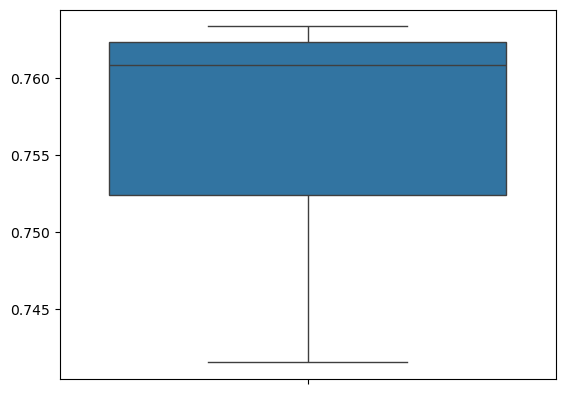

In [163]:
sns.boxplot(lr_cvs)

##### <font color='Blue'>INFERENCE :</font>
- The Validation score for Logistic Regression for 10 K-Fold are indicating consistent performance
- Ranges from 0.74 to 0.76
- Suggest that the model is decent and reliable to predict across different subsets of dataset

###### =========================================================================================================

##### Decision Tree Model 

In [113]:
dt = DecisionTreeClassifier(random_state = 15)
dt_model = dt.fit(xtrain,ytrain)

dt_train_pred = dt_model.predict(xtrain)
dt_test_pred = dt_model.predict(xtest)

print('Training Accuracy:',dt.score(xtrain,ytrain)*100)
print('Testing Accuracy:',dt.score(xtest,ytest)*100)

Training Accuracy: 100.0
Testing Accuracy: 80.95931256309721


In [115]:
print('Training F1 Score:',f1_score(ytrain,dt_train_pred))
print('Testing F1 Score',f1_score(ytest,dt_test_pred))

Training F1 Score: 1.0
Testing F1 Score 0.8114392001860032


##### <font color='Blue'>INFERENCE :</font>
- Train F1 Score : 1.0
- Test F1 Score  : 0.81
- This is the base model of Decision Tree and without any pruning the model is Overfitting

##### Decision Tree Model  (HYPER PARAMETER - TUNING)

In [116]:
%%time
params = [{'criterion':['gini','entropy'],
           'max_depth':range(1,15),
           'min_samples_split':range(3,11),
           'min_samples_leaf':range(1,11),}]

grid = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 15),param_distributions = params, 
                          cv = 7,scoring='f1')
grid_model = grid.fit(xtrain,ytrain)

best_param = grid_model.best_params_
print('Best Parameters:',best_param)

Best Parameters: {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 13, 'criterion': 'entropy'}
CPU times: total: 35.8 s
Wall time: 36 s


##### Decision Tree Tunned Model 

In [118]:
dt_tunned = DecisionTreeClassifier(**best_param,random_state = 15)
dt_tunned_model = dt_tunned.fit(xtrain,ytrain)

dt_tunned_train_pred = dt_tunned_model.predict(xtrain)
dt_tunned_test_pred = dt_tunned_model.predict(xtest)

print('Training Accuracy:',dt_tunned.score(xtrain,ytrain)*100)
print('Testing Accuracy:',dt_tunned.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,dt_tunned_train_pred))
print('Testing F1 Score',f1_score(ytest,dt_tunned_test_pred))

Training Accuracy: 84.14517573428051
Testing Accuracy: 81.3725260019252
----------------------------------------------------------------------------
Training F1 Score: 0.8459651009335746
Testing F1 Score 0.8180191751915226


##### <font color='Blue'>INFERENCE :</font>
- Tunned Trained F1 Score : 0.84
- Tunned Test F1 Score    : 0.81
- After Tunning the model is no longer overfits and have good F1 Scores 

#### Cross Val Score (Decision Tree)

In [133]:
dt_tunned_cvs = cross_val_score(dt_tunned,x,y,cv = 10)
dt_tunned_cvs

array([0.70045077, 0.70869136, 0.80222567, 0.844626  , 0.83786449,
       0.84047049, 0.84785518, 0.84686906, 0.84827781, 0.84651687])

<Axes: >

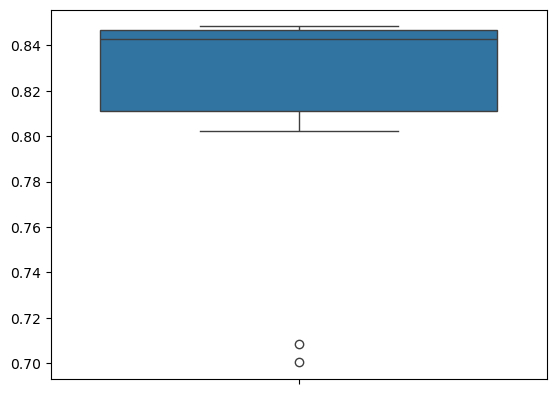

In [164]:
sns.boxplot(dt_tunned_cvs)

##### <font color='Blue'>INFERENCE :</font>
- The Validation score for Tunned Decision Tree for 10 K-Fold are indicating consistent performance
- Ranges from 0.70 to 0.85 with average of 0.82
- There is some variability as the lowest range 0.70 and highest is 0.84
- Though there is variability (0.15), still the model is consistent in overall performance and generalizes well on unseen data

###### =========================================================================================================

##### Random Forest Model 

In [120]:
rf = RandomForestClassifier(random_state = 15)
rf_model = rf.fit(xtrain,ytrain)

rf_train_pred = rf_model.predict(xtrain)
rf_test_pred = rf_model.predict(xtest)

print('Training Accuracy:',rf.score(xtrain,ytrain)*100)
print('Testing Accuracy:',rf.score(xtest,ytest)*100)
print('-------------------------------------------------------')
print('Train F1 Score:',f1_score(ytrain,rf_train_pred))
print('Test F1 Score:',f1_score(ytest,rf_test_pred))

Training Accuracy: 100.0
Testing Accuracy: 88.10602681191745
-------------------------------------------------------
Train F1 Score: 1.0
Test F1 Score: 0.880828040461068


##### <font color='Blue'>INFERENCE :</font>
- Train F1 Score : 1.0
- Test F1 Score  : 0.88
- This is the base model of Random Forest 
- This model is Overfitting

##### Random Forest Model  (HYPER PARAMETER - TUNING)

In [232]:
%%time
params = [{'n_estimators':[10,15,20,25,30,35,40,45,50],
           'criterion':['gini','entropy'],
           'max_depth':range(1,15),
           'min_samples_split':range(3,11),
           'min_samples_leaf':range(1,11),}]

grid = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 15),param_distributions = params, cv = 10,
                          scoring='f1')
grid_model = grid.fit(xtrain,ytrain)

best_param = grid_model.best_params_
print('Best Parameters:',best_param)

Best Parameters: {'n_estimators': 40, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_depth': 13, 'criterion': 'entropy'}
CPU times: total: 4min 17s
Wall time: 4min 40s


##### Random Forest Tunned Model 

In [121]:
rf_tunned = RandomForestClassifier(**best_param,random_state = 15)
rf_tunned_model = rf_tunned.fit(xtrain,ytrain)

rf_tunned_train_pred = rf_tunned_model.predict(xtrain)
rf_tunned_test_pred = rf_tunned_model.predict(xtest)

print('Training Accuracy:',rf_tunned.score(xtrain,ytrain)*100)
print('Testing Accuracy:',rf_tunned.score(xtest,ytest)*100)
print('-------------------------------------------------------')
print('Train F1 Score:',f1_score(ytrain,rf_tunned_train_pred))
print('Test F1 Score:',f1_score(ytest,rf_tunned_test_pred))

Training Accuracy: 85.31036495175232
Testing Accuracy: 82.95025004108656
-------------------------------------------------------
Train F1 Score: 0.8602337893598077
Test F1 Score: 0.8372405755524676


##### <font color='Blue'>INFERENCE :</font>
- Train F1 Score : 0.86
- Test F1 Score  : 0.83
- After Tunning the parameters of Random Forest using Random Search CV, We have removed overfitting 

#### Cross Val Score (Random Forest)

In [135]:
rf_tunned_cvs = cross_val_score(rf_tunned,x,y,cv = 10)
rf_tunned_cvs

array([0.73017326, 0.73482181, 0.82251021, 0.85702212, 0.85624736,
       0.85758558, 0.86074523, 0.85623723, 0.86271748, 0.85680073])

<Axes: >

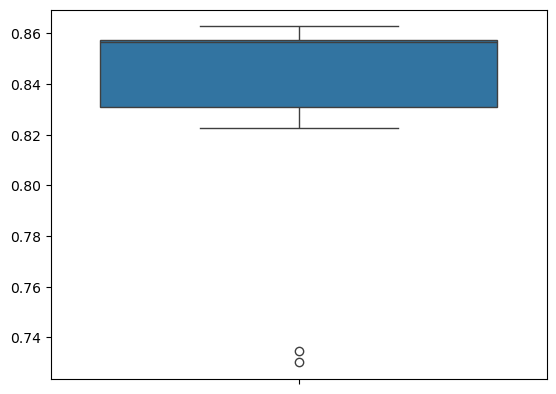

In [165]:
sns.boxplot(rf_tunned_cvs)

##### <font color='Blue'>INFERENCE :</font>
- Validation of Tunned Random Forest on 10 K-Fold ranges from 0.73 to 0.85
- More Consistent than Decision Tree, most of the scores are above 0.82 
- Though there is variability (0.13), still the model is fairly consistent in overall performance and generalizes well on unseen data 

##### KNN Model 

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(xtrain,ytrain)
knn_train_pred = knn_model.predict(xtrain)
knn_test_pred = knn_model.predict(xtest)

print('Training Accuracy:', knn.score(xtrain,ytrain)*100)
print('Testing Accuracy:',knn.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,knn_train_pred))
print('Testing F1 Score',f1_score(ytest,knn_test_pred))

Training Accuracy: 85.42004165702383
Testing Accuracy: 79.2923719860071
----------------------------------------------------------------------------
Training F1 Score: 0.8701752499731211
Testing F1 Score 0.8194325021496132


##### <font color='Blue'>INFERENCE :</font>
- Train F1 Score : 0.87
- Test F1 Score  : 0.81
- The difference between there Train and Test F1 Score is large and even more than compared to other models
- Not a great model

#### Cross Val Score (KNN)

In [136]:
knn_cvs = cross_val_score(knn,x,y,cv = 10)
knn_cvs

array([0.7966615 , 0.7916608 , 0.80666291, 0.81898859, 0.81180448,
       0.81469221, 0.81594703, 0.81580616, 0.81665141, 0.81975065])

<Axes: >

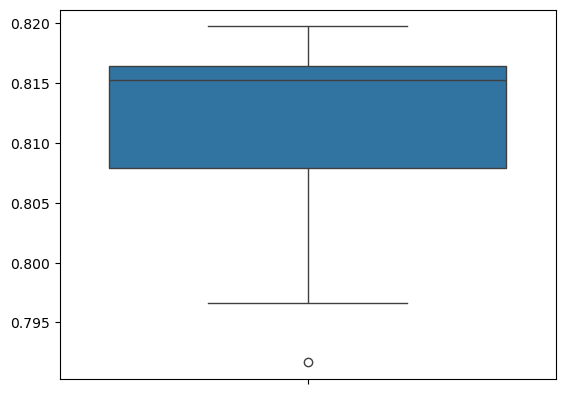

In [166]:
sns.boxplot(knn_cvs)

##### <font color='Blue'>INFERENCE :</font>
- Validation of KNN on 10 K-Fold ranges from 0.79 to 0.82
- Indication very consistent performance
- Having minimal variability (0.03) better than both Decision Tree and Random Forest
- The model is very stable and generalize well on unseen data

##### NAIVE BAYES Model 

In [123]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_model = gnb.fit(xtrain,ytrain)
gnb_train_pred = gnb_model.predict(xtrain)
gnb_test_pred = gnb_model.predict(xtest)

print('Training Accuracy:', gnb.score(xtrain,ytrain)*100)
print('Testing Accuracy:',gnb.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,gnb_train_pred))
print('Testing F1 Score',f1_score(ytest,gnb_test_pred))

Training Accuracy: 52.40634716198947
Testing Accuracy: 52.09776254314089
----------------------------------------------------------------------------
Training F1 Score: 0.6749006831896849
Testing F1 Score 0.6721198193710126


#### Cross Val Score (Naive Bayes)

In [137]:
nb_cvs = cross_val_score(gnb,x,y,cv = 10)
nb_cvs

array([0.51929849, 0.52141147, 0.52176363, 0.52253839, 0.5236653 ,
       0.52401747, 0.52335   , 0.52285694, 0.52377263, 0.52342044])

<Axes: >

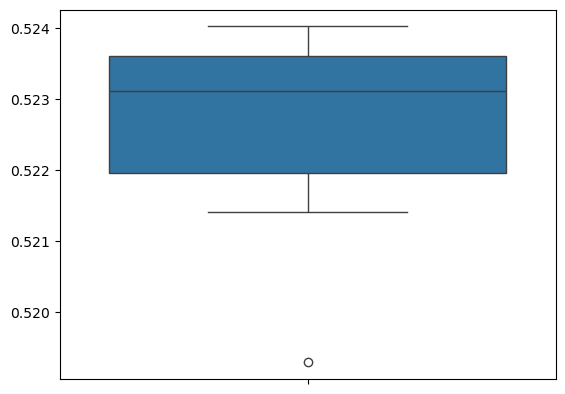

In [172]:
sns.boxplot(nb_cvs)

##### <font color='Blue'>INFERENCE :</font>
- Validation of Naive Bayes on 10 K-Fold ranges from 0.51 to 0.52
- Model consistency and stability is good but overall performance is low

##### SGD Model 

In [129]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=15)
sgd_model = sgd.fit(xtrain,ytrain)
sgd_train_pred = sgd_model.predict(xtrain)
sgd_test_pred = sgd_model.predict(xtest)

print('Training Accuracy:', sgd.score(xtrain,ytrain)*100)
print('Testing Accuracy:', sgd.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,sgd_train_pred))
print('Testing F1 Score',f1_score(ytest,sgd_test_pred))

Training Accuracy: 75.66585834599479
Testing Accuracy: 75.35040969173339
----------------------------------------------------------------------------
Training F1 Score: 0.7753627226959445
Testing F1 Score 0.771457802738414


#### Cross Val Score (SGD)

In [138]:
sgd_cvs = cross_val_score(sgd,x,y,cv = 10)
sgd_cvs

array([0.73982251, 0.74531624, 0.7458797 , 0.75750106, 0.75989576,
       0.75834625, 0.76304853, 0.75931535, 0.75360992, 0.76009016])

<Axes: >

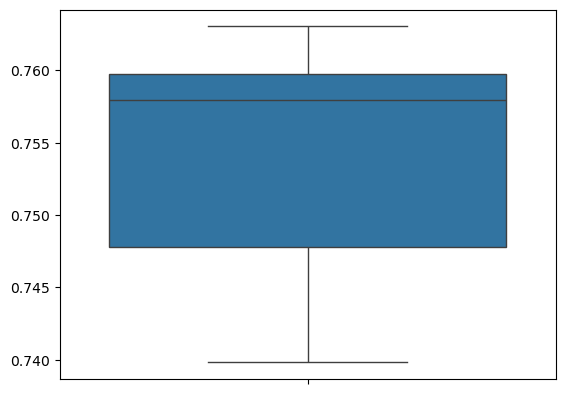

In [167]:
sns.boxplot(sgd_cvs)

##### <font color='Blue'>INFERENCE :</font>
- Validation score range from 0.74 to 0.76.
- Very low variability around 0.02.
- Indicating model fairly consistent and stable performance and generalize well on unseen data but with lower score.

##### ADA-BOOST Model 

In [128]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada_model = ada.fit(xtrain,ytrain)
ada_train_pred = ada_model.predict(xtrain)
ada_test_pred = ada_model.predict(xtest)

print('Training Accuracy:', ada.score(xtrain,ytrain)*100)
print('Testing Accuracy:',ada.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,ada_train_pred))
print('Testing F1 Score',f1_score(ytest,ada_test_pred))

Training Accuracy: 81.86410150629384
Testing Accuracy: 81.37017819829549
----------------------------------------------------------------------------
Training F1 Score: 0.8257607981129887
Testing F1 Score 0.820194421155197


#### Cross Val Score (ADA Boost)

In [168]:
ada_cvs = cross_val_score(ada,x,y,cv = 10)
ada_cvs

array([0.72010142, 0.72305959, 0.8018735 , 0.84082265, 0.83589238,
       0.84230173, 0.84102275, 0.83771219, 0.84229062, 0.84158625])

<Axes: >

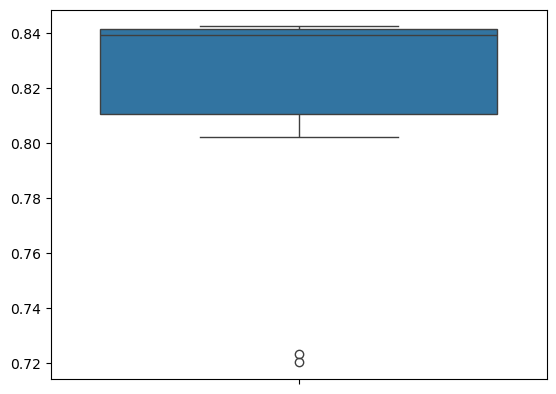

In [169]:
sns.boxplot(ada_cvs)

##### <font color='Blue'>INFERENCE :</font>
- Validation Scores range from 0.72 to 0.84.
- There is High variability, around 0.12.
- The model have some variability but generally high performance, most score higher than 0.83

##### GRADIENT BOOST Model 

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,random_state=15)
gbc_model = gbc.fit(xtrain,ytrain)
gbc_train_pred = gbc_model.predict(xtrain)
gbc_test_pred = gbc_model.predict(xtest)

print('Training Accuracy:', gbc.score(xtrain,ytrain)*100)
print('Testing Accuracy:',gbc.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,gbc_train_pred))
print('Testing F1 Score',f1_score(ytest,gbc_test_pred))

Training Accuracy: 84.4651499753479
Testing Accuracy: 84.00676167445354
----------------------------------------------------------------------------
Training F1 Score: 0.8471522339593501
Testing F1 Score 0.841926950387525


##### GRADIENT BOOST Model  (HYPER PARAMETER - TUNING)

In [239]:
params = [{'n_estimators':[10,15,20,25,30,35,40,45,50],
           'learning_rate': [0.1,0.2,0.3,0.4,0.5],
           'max_depth':range(1,15),
           'min_samples_split':range(3,11),
           'min_samples_leaf':range(1,11)}]

grid = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state = 15),param_distributions = params, cv = 10,scoring = 'f1')
grid_model = grid.fit(xtrain,ytrain)

best_param = grid_model.best_params_
print('Best Parameters:',best_param)

Best Parameters: {'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.5}
CPU times: total: 19min 42s
Wall time: 21min 52s


##### GRADIENT BOOST Tunned Model

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_tunned = GradientBoostingClassifier(**best_param,random_state=15)
gbc_tunned_model = gbc_tunned.fit(xtrain,ytrain)

gbc_tunned_train_pred = gbc_tunned_model.predict(xtrain)
gbc_tunned_test_pred = gbc_tunned_model.predict(xtest)

print('Training Accuracy:', gbc_tunned.score(xtrain,ytrain)*100)
print('Testing Accuracy:',gbc_tunned.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,gbc_tunned_train_pred))
print('Testing F1 Score',f1_score(ytest,gbc_tunned_test_pred))

Training Accuracy: 90.30216435406457
Testing Accuracy: 88.75636841734558
----------------------------------------------------------------------------
Training F1 Score: 0.8997420213872591
Testing F1 Score 0.8834083992696288


#### Cross Val Score (Tunned GB)

In [159]:
gb_cvs = cross_val_score(gbc_tunned,x,y,cv = 10)
gb_cvs

array([0.62360896, 0.62297507, 0.8613185 , 0.95400761, 0.9522468 ,
       0.95435977, 0.95865324, 0.95076425, 0.95611749, 0.95597661])

<Axes: >

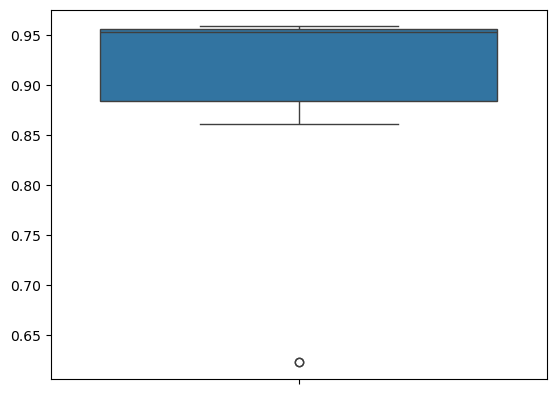

In [160]:
sns.boxplot(gb_cvs)

##### <font color='Blue'>INFERENCE :</font> 
- Validation Scores range from approximately 0.62 to 0.96.
- High variability, around 0.34 but then consistency increased.
- Significant variability, very high performance in some folds.
- Indicating potential sensitivity to specific data splits

##### XG BOOST Model

In [131]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model = xgb.fit(xtrain,ytrain)
xgb_train_pred = xgb_model.predict(xtrain)
xgb_test_pred = xgb_model.predict(xtest)

print('Training Accuracy:', xgb.score(xtrain,ytrain)*100)
print('Testing Accuracy:',xgb.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,xgb_train_pred))
print('Testing F1 Score:',f1_score(ytest,xgb_test_pred))

Training Accuracy: 91.4723846130626
Testing Accuracy: 89.00993120935365
----------------------------------------------------------------------------
Training F1 Score: 0.9108091895475736
Testing F1 Score: 0.8846788697001798


##### XG BOOST Model  (HYPER PARAMETER - TUNING)

In [242]:
params = [{'n_estimators':[50,100,150,200,250],
          'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          'max_depth' : range(1,15),
          'gamma':[0,1,2,3,4],
          'reg_lambda':[1,2,3]}]

grid = RandomizedSearchCV(estimator = XGBClassifier(random_state = 15),param_distributions = params, cv = 10,scoring = 'f1')
grid_model = grid.fit(xtrain,ytrain)

best_param = grid_model.best_params_
print('Best Parameters:',best_param)

Best Parameters: {'reg_lambda': 2, 'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.5, 'gamma': 0}


##### XG BOOST Tunned Model

In [132]:
xgb_tunned = XGBClassifier(**best_param,random_state=15)
xgb_tunned_model = xgb_tunned.fit(xtrain,ytrain)
xgb_tunned_train_pred = xgb_tunned_model.predict(xtrain)
xgb_tunned_test_pred = xgb_tunned_model.predict(xtest)

print('Training Accuracy:', xgb_tunned.score(xtrain,ytrain)*100)
print('Testing Accuracy:',xgb_tunned.score(xtest,ytest)*100)
print('----------------------------------------------------------------------------')
print('Training F1 Score:',f1_score(ytrain,xgb_tunned_train_pred))
print('Testing F1 Score:',f1_score(ytest,xgb_tunned_test_pred))

Training Accuracy: 100.0
Testing Accuracy: 89.11323456906064
----------------------------------------------------------------------------
Training F1 Score: 1.0
Testing F1 Score: 0.887426865091889


#### Cross Val Score (Tunned XGBoost)

In [170]:
xg_cvs = cross_val_score(xgb_tunned,x,y,cv = 10)
xg_cvs

array([0.64868291, 0.64678124, 0.86786871, 0.95541626, 0.9522468 ,
       0.95414847, 0.95625836, 0.95294781, 0.95851236, 0.95569487])

<Axes: >

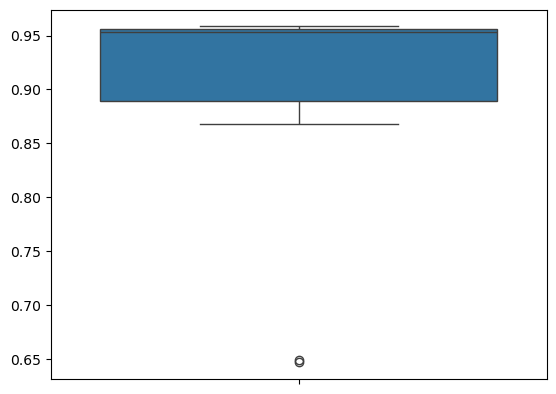

In [171]:
sns.boxplot(xg_cvs)

##### <font color='Blue'>INFERENCE :</font>
- Same as Tunned Gradient Boosting 
- Significant variability, very high performance in some folds.
- Indicating potential sensitivity to specific data splits

#### ==================================================================================================

#### DataFrame with model and thier F1 Score

In [144]:
model = ['Logistic',
         'Decision Tree_Base','Decision Tree_Tunned',
         'Random Forest_Base','Random Forest_Tunned',
         'KNN',
         'Naive Bayes',
         'SGD Classifier',
         'Ada Boost',
         'Gradient Boosting_Base','Gradient Boosting_Tunned',
         'XG Boost_Base','XG Boost_Tunned']
train_f1_score = [0.768,1.0,0.84,1.0,0.86,0.87,0.674,0.775,0.825,0.847,0.89,0.91,1.00]
test_f1_score = [0.764,0.81,0.81,0.88,0.83,0.81,0.672,0.771,0.820,0.841,0.88,0.88,0.887]

In [145]:
df_model = pd.DataFrame({
    'Model Name': model,
    'Train F1 Score': train_f1_score,
    'Test F1 Score': test_f1_score
})

df_model

,Model Name,Train F1 Score,Test F1 Score
0,Logistic,0.768,0.764
1,Decision Tree_Base,1.000,0.810
2,Decision Tree_Tunned,0.840,0.810
3,Random Forest_Base,1.000,0.880
4,Random Forest_Tunned,0.860,0.830
5,KNN,0.870,0.810
6,Naive Bayes,0.674,0.672
7,SGD Classifier,0.775,0.771
8,Ada Boost,0.825,0.820
9,Gradient Boosting_Base,0.847,0.841


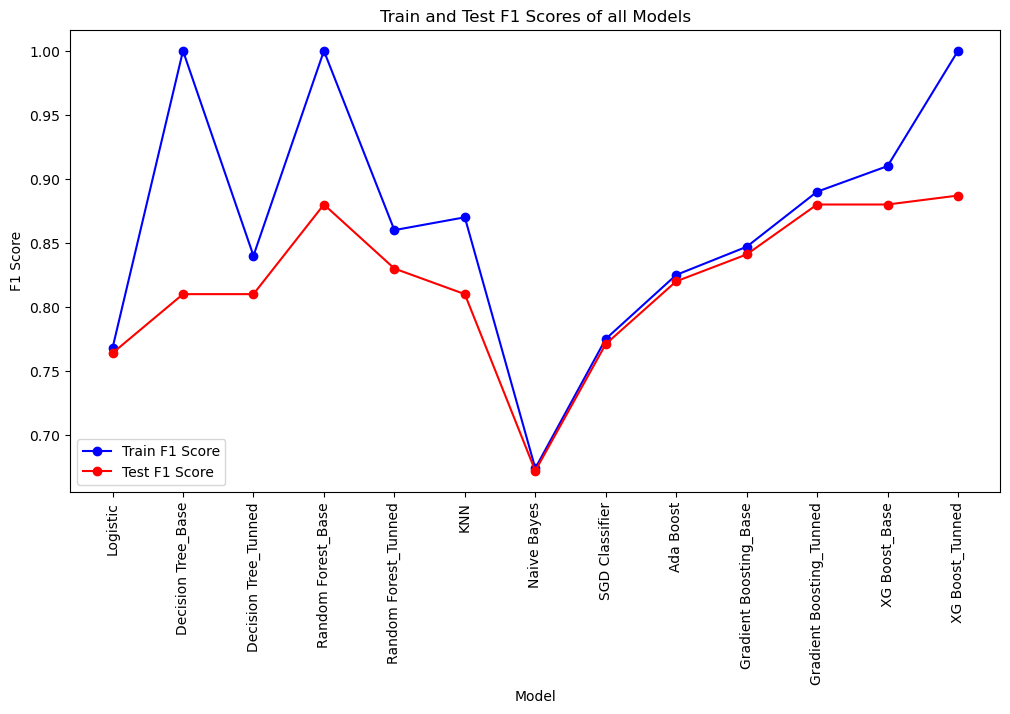

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(model, train_f1_score, marker='o', linestyle='-', color='b', label='Train F1 Score')
plt.plot(model, test_f1_score, marker='o', linestyle='-', color='r', label='Test F1 Score')  
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Train and Test F1 Scores of all Models')
plt.xticks(rotation=90)
plt.legend()

#### Selecting Final Model :
- Tunned Gradient Boosting Model is best out of all the other models 
- Best Train and Test F1 Score among all other models
- We need highest performance a little variability is acceptable so choosing Tunned Gradient Boosting model which have consistence overall performance and higher and stable F1 score with high model accuracy

# ===========================================================